In [1]:
%run src/embedding.py
%run src/trainer.py

from src.tools import reset_cuda
reset_cuda()

output_folder = '../../AIzymes_resi14'

df_path         = './data/all_scores_pooled_cut.csv'
df_path         = './data/all_scores_pooled.csv'

output_folder   = '../../AIzymes_resi99'
df_path         = './data/all_scores_mpnn_bias1.csv'
esm2_model      = "facebook/esm2_t33_650M_UR50D"
esm2_model      = "facebook/esm2_t48_15B_UR50D"
#esm2_model      = "facebook/esm2_t36_3B_UR50D"

dataset = make_dataset(
    output_folder   = output_folder
    )

df = make_dataset.load_dataset(    
    dataset,            
    df_path         = df_path,
    scores          = ['interface_score', 'total_score', 'interface_potential', 'total_potential'],
    labels          = ['score_taken_from', 'design_method', 'cat_resn', 'cat_resi', 'parent_index', 'generation', 'mutations'],
    cat_resi        = None,
    select_unique   = True
    )

df = make_dataset.make_embeddings( 
    dataset,
    embeddings      = ['onehot','plm','plm_pca','onehot_plm_pca'],
    pooling_method  = 'concatenate',
    pca_dim         = 50,
    esm2_model      = esm2_model
    )

print(df.iloc[0])

c:\Users\bunzelh\.conda\envs\narupa\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fitness Landscape Tools loaded.
Trainers loaded.
Data loaded from: ./data/all_scores_mpnn_bias1.csv
Data normalized.


c:\Users\bunzelh\.conda\envs\narupa\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bunzelh\.cache\huggingface\hub\models--facebook--esm2_t48_15B_UR50D. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


KeyboardInterrupt: 

In [ ]:
%run src/embedding.py
%run src/trainer.py

dataset = make_dataset(output_folder = output_folder)
df = make_dataset.load_self_from_file(dataset, output_folder)
output = train_model(
    dataset = dataset,
    encoding = 'onehot',
    epochs  = 200,
    verbose = False,
    output_folder = output_folder
    )

Fitness Landscape Tools loaded.
Trainers loaded.
All variables loaded from ../../AIzymes_resi14/self.pkl


 99%|█████████▉| 199/201 [10:04<00:06,  3.04s/it]


dict_keys(['model', 'train_epoch', 'train_loss_per_epoch', 'train_mae_per_epoch', 'test_epoch', 'test_loss_per_epoch', 'test_mae_per_epoch', 'yyhat', 'pearsonr', 'pval', 'slope', 'intercept', 'r_value', 'p_value', 'std_err', 'encoding', 'score', 'epochs'])


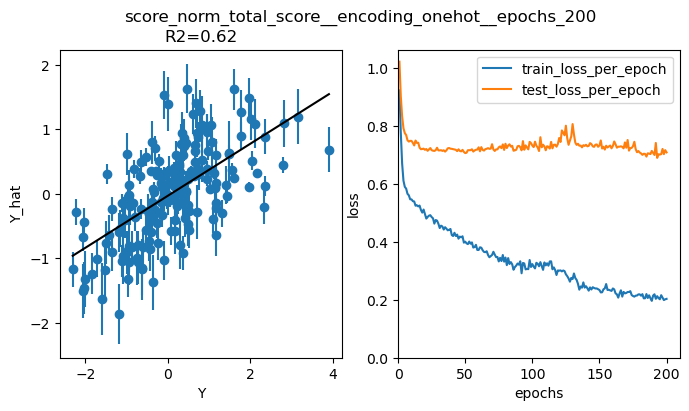

In [169]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
print(output.keys())
axs[0].errorbar(output['yyhat']['y'], output['yyhat']['yhat'], output['yyhat']['dyhat'], linestyle='None', marker='o')
x = np.array([min(output['yyhat']['y']),max(output['yyhat']['y'])])
y = x * output['slope'] + output['intercept'] 
axs[0].plot(x, y, c='k', zorder = 100)
axs[0].set_title(f'R2=%.2f' % (output['pearsonr']))
axs[0].set_xlabel("Y")
axs[0].set_ylabel("Y_hat")

axs[1].plot(output['train_epoch'], output['train_loss_per_epoch'], label = 'train_loss_per_epoch')
axs[1].plot(output['test_epoch'], output['test_loss_per_epoch'], label = 'test_loss_per_epoch')
axs[1].legend()
axs[1].set_ylim(bottom=0)
axs[1].set_xlim(left=0)
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("loss")

title = f"score_{output['score']}__encoding_{output['encoding']}__epochs_{output['epochs']}"
fig.suptitle(title)
fig.savefig(f"{output_folder}/{title}.png", dpi=300, bbox_inches='tight', transparent=False)

plt.show()

(0.0, 20.95)

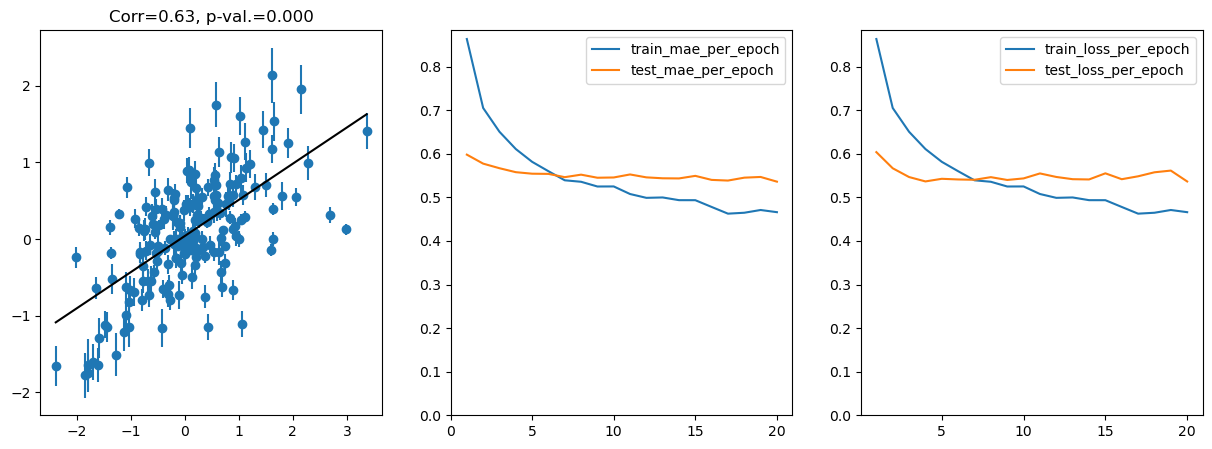

In [132]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axs[0].errorbar(output['yyhat']['y'], output['yyhat']['yhat'], output['yyhat']['dyhat'], linestyle='None', marker='o')
x = np.array([min(output['yyhat']['y']),max(output['yyhat']['y'])])
y = x * output['slope'] + output['intercept'] 
axs[0].plot(x, y, c='k', zorder = 100)
axs[0].set_title(f'Corr=%.2f, p-val.=%.3f' % (output['pearsonr'], output['pval']))

axs[1].plot(output['train_epoch'], output['train_mae_per_epoch'], label = 'train_mae_per_epoch')
axs[1].plot(output['test_epoch'], output['test_mae_per_epoch'], label = 'test_mae_per_epoch')
axs[1].legend()
axs[1].set_ylim(bottom=0)
axs[1].set_xlim(left=0)

axs[2].plot(output['train_epoch'], output['train_loss_per_epoch'], label = 'train_loss_per_epoch')
axs[2].plot(output['test_epoch'], output['test_loss_per_epoch'], label = 'test_loss_per_epoch')
axs[2].legend()
axs[2].set_ylim(bottom=0)
axs[1].set_xlim(left=0)


In [ ]:
"""
plotting functions leave in
utilities/plot.py

for vae: check generative!

github copilot
"""

In [ ]:
print(df['onehot_plm_pca'])

17       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
18       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
19       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
20       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
21       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
19243    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
19244    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
19245    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
19246    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
19604    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: onehot_plm_pca, Length: 1910, dtype: object


In [ ]:
#print(df.iloc[0])
print(dataset.df.iloc[0])

In [ ]:
import torch

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA version: {torch.version.cuda}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"Device name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available")

In [ ]:
# Reading the dataset
df_path = './data/all_scores_pooled.csv'
df = pd.read_csv(df_path)

# Defining the scores (regression values) and labels from the AIzymes run to be used in the torch Dataset
scores = ['interface_score', 'total_score', 'catalytic_score', 'interface_potential', 'total_potential', 'catalytic_potential', 'generation', 'mutations']
labels = ['score_taken_from', 'design_method', 'cat_resn', 'cat_resi', 'parent_index']
    
# Filtering out duplicate sequences and averaging scores
def select_unique(df, scores, labels):
    score_df = df.groupby('sequence')[scores].mean().reset_index()
    label_df = df.drop_duplicates('sequence')[labels + ['sequence']]
    df = pd.merge(score_df, label_df, on='sequence')

    return df

df = select_unique(df, scores, labels)

df = df[df['cat_resi'] == 14]
gp_ds_train = AIzymesDataset(train_df, scores, labels)
gp_ds_test = AIzymesDataset(test_df, scores, labels)

gp_ds_train.onehot_sequences()
gp_ds_test.onehot_sequences()

plm = EnzymePLM(device = device, pca_dim = 50) #Also make that PCA explained variance plot...
pooling_methods = ['class', 'average', 'concatenate'] #will not test 'concatenate' due to high dimensionality

gp_ds_train.embed_sequences(plm, pooling_methods)
gp_ds_test.embed_sequences(plm, pooling_methods)

In [ ]:
# Create one-hot encodings
embedding_dataset.onehot_sequences()

train_ds_1.onehot_sequences()
test_ds_1.onehot_sequences()

train_ds_2.onehot_sequences()
test_ds_2.onehot_sequences()

In [ ]:
plm = EnzymePLM(device = device, pca_dim = 50) #Also make that PCA explained variance plot...

In [ ]:
# Create ESM embeddings
pooling_methods = ['class', 'average', 'pca_concatenate'] #will not test 'concatenate' due to high dimensionality

train_ds_1.embed_sequences(plm, pooling_methods)
test_ds_1.embed_sequences(plm, pooling_methods)

train_ds_2.embed_sequences(plm, pooling_methods)
test_ds_2.embed_sequences(plm, pooling_methods)


In [ ]:
# Requirements for VAE training (//Clean up and integrate into the existing dataset class//)

df = pd.read_csv('/cluster/home/tcotet/fitness_landscapes/data/all_scores_pooled.csv')
scores = ['interface_score', 'total_score', 'catalytic_score', 'interface_potential', 'total_potential', 'catalytic_potential', 'generation', 'mutations']
labels = ['score_taken_from', 'design_method', 'cat_resn', 'cat_resi', 'parent_index']
df = df[df['sequence'].notnull()]
df = select_unique(df, scores, labels)
seq = df['sequence'].tolist()
label = df['cat_resi'].tolist()

dataset = VDJ_dataset(seq, label, task = 'multiclass.classification')
scores = df['total_score'].tolist()
score_dataset = VDJ_dataset(seq, scores, task = 'regression')

train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False)

In [ ]:
# Training VAE for feature extraction
args = Args()
args.input_size = dataset.max_len * 19
args.epochs = 100
args.w_categ = 1
args.w_recon = 1

gmvae = GMVAE(args)

history_loss = gmvae.train(train_loader, val_loader)

In [ ]:

temp1 = VDJ_dataset(train_ds_1.sequences, train_ds_1.labels['cat_resi'], task = 'multiclass.classification')
temp1_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False)
embedding_dataset.embeddings['vae'] 

pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)
umap = UMAP()

In [ ]:
import numpy as np

In [ ]:
ds = train_ds_1

temp = VDJ_dataset(ds.sequences, ds.labels['cat_resi'], task = 'multiclass.classification')
temp_loader = torch.utils.data.DataLoader(temp, batch_size=64, shuffle=False)
features, labs = gmvae.latent_features(temp_loader, return_labels = True)
ds.embeddings['vae'] = [features[i] for i in range(features.shape[0])]

t1 = ds


ds = test_ds_1

temp = VDJ_dataset(ds.sequences, ds.labels['cat_resi'], task = 'multiclass.classification')
temp_loader = torch.utils.data.DataLoader(temp, batch_size=64, shuffle=False)
features, labs = gmvae.latent_features(temp_loader, return_labels = True)
ds.embeddings['vae'] = [features[i] for i in range(features.shape[0])]

tt1 = ds


ds = train_ds_2

temp = VDJ_dataset(ds.sequences, ds.labels['cat_resi'], task = 'multiclass.classification')
temp_loader = torch.utils.data.DataLoader(temp, batch_size=64, shuffle=False)
features, labs = gmvae.latent_features(temp_loader, return_labels = True)
ds.embeddings['vae'] = [features[i] for i in range(features.shape[0])]

t2 = ds


ds = test_ds_2

temp = VDJ_dataset(ds.sequences, ds.labels['cat_resi'], task = 'multiclass.classification')
temp_loader = torch.utils.data.DataLoader(temp, batch_size=64, shuffle=False)
features, labs = gmvae.latent_features(temp_loader, return_labels = True)
ds.embeddings['vae'] = [features[i] for i in range(features.shape[0])]

tt2 = ds


In [ ]:
from abc import abstractmethod
import os

import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn

from fitness.losses import bt_loss

class FitnessTrainer:
    def __init__(self):
        self.models = {}
        self.optimizers = {}
        self.history = {}
        self.scores = []
        self.device = None
        self.loss_fn = None

    @abstractmethod
    def train(self):
        pass

    @abstractmethod
    def predict(self):
        pass

    @abstractmethod
    def evaluate(self):
        pass

    @abstractmethod
    def plot_training_metrics(self):
        pass

    @abstractmethod
    def save_history(self):
        pass

    @abstractmethod
    def update_history(self):
        pass

    @abstractmethod
    def save_model_checkpoint(self):
        pass

    @abstractmethod
    def load_model_checkpoint(self):
        pass

    @abstractmethod
    def encode_inputs(self, input):
        pass
    
    
class TrainerGeneral(FitnessTrainer):
    def __init__(self, model, optim,
                       device,
                       lr = 0.001,
                       epochs = 20,
                       loss = 'bt',
                       encoding = 'onehot',
                       scores = ['norm_interface_score', 'norm_total_score'],
                       features = None,
                       verbose = True,
                       checkpoint_path = './checkpoint',
                       checkpoint_epoch = 10,
                       validate_epoch = 1):

        super().__init__()

        self.epochs = epochs
        self.scores = scores
        self.device = device
        self.features = features
        self.encoding = encoding
        self.verbose = verbose

        for score in self.scores:
            self.models[score] = model.to(device)
            self.optimizers[score] = optim(self.models[score].parameters(), lr = lr)

        if loss == 'bt':
            self.loss_fn = bt_loss
        else:
            self.loss_fn = F.mse_loss


        self.checkpoint_path = checkpoint_path
        if self.checkpoint_path is not None and os.path.isdir(self.checkpoint_path) is False:
            os.mkdir(self.checkpoint_path)
        self.checkpoint_epoch = checkpoint_epoch
        self.validate_epoch = validate_epoch
        
        self.history = dict(zip(scores, [None] * len(scores)))

    def train(self, train_dl, valid_dl):
        for score in self.scores:
            self.history[score] = {'train_epoch': [], 'train_loss_per_epoch': [], 'validation_epoch': [], 'validation_loss_per_epoch': []}
            if self.verbose:
                print(f'### Training regression model to predict: {score} ###')

            for epoch in range(1, self.epochs + 1):
                self.models[score].train()

                losses_per_epoch = []
                for iter, batch in enumerate(train_dl):

                    y = batch[score].to(device)

                    self.optimizers[score].zero_grad()
                    y_hat = self.predict(batch, score)

                    loss = self.loss_fn(y_hat, y)
                    loss.backward()

                    self.optimizers[score].step()

                    losses_per_epoch.append(loss.item())

                self.history[score]['train_epoch'].append(epoch)
                self.history[score]['train_loss_per_epoch'].append(np.mean(losses_per_epoch))

                if self.verbose:
                    print(f"[Train] epoch:{epoch} \t loss:{np.mean(losses_per_epoch):.4f}")

                if epoch % self.validate_epoch == 0:
                    valid_loss = self.validate(valid_dl, score)
                    self.history[score]['validation_epoch'].append(epoch)
                    self.history[score]['validation_loss_per_epoch'].append(valid_loss)

                    if self.verbose:
                        print(f"[Validation] epoch:{epoch} \t loss:{valid_loss:.4f}")


                if self.checkpoint_path is not None:
                    if epoch % self.checkpoint_epoch == 0:
                        torch.save({
                            'epoch': epoch,
                            'model_state_dict': self.models[score].state_dict(),
                            'optimizer_state_dict': self.optimizers[score].state_dict(),
                            'loss': np.mean(losses_per_epoch),
                        }, os.path.join(self.checkpoint_path, f'model_{score}_checkpoint_{epoch}.pt'))

        return self.models

    def encode_inputs(self, input):
        if self.encoding == 'onehot_flatten':
            enc = input['onehot'].reshape(input['onehot'].shape[0], -1) #Flattens one-hot

        elif self.encoding == 'onehot':
            enc = input['onehot']

        elif self.encoding == 'onehot_aizymes_features':
            enc = input['onehot'].reshape(input['onehot'].shape[0], -1)
            feat_list = [input[feat] for feat in self.features] + [enc]
            enc = torch.cat(feat_list, axis = -1)

        elif self.encoding == 'esm2':
            enc = input['esm2']

        elif self.encoding == 'vae':
            enc = input['vae']

        elif self.encoding == 'aizymes_features':
            feat_list = [input[feat] for feat in self.features]
            enc = torch.cat(feat_list, axis = -1)
        else:
            raise ValueError(f'Unrecognized encoding argument {self.encoding}!')

        enc = enc.to(self.device)

        return enc.float()

    def predict(self, input, score):
        enc = self.encode_inputs(input)

        return self.models[score](enc)

    def predict_mc_dropout(self, input, score, forward_passes = 50):
        enc = self.encode_inputs(input)

        dropout_predictions = np.empty((0, enc.shape[0], 1))

        for i in range(forward_passes):
            self.models[score].eval()
            self.enable_dropout(self.models[score])
            predictions = self.models[score](enc).cpu().detach().numpy()
            dropout_predictions = np.vstack((dropout_predictions,
                                             predictions[np.newaxis, :, :]))


        mean = np.mean(dropout_predictions, axis=0)
        std = np.std(dropout_predictions, axis=0)
        y = input[score].cpu().detach().numpy()

        return {'y_hat': np.squeeze(dropout_predictions, axis = -1),
                'mean': np.squeeze(mean, axis = -1),
                'std': np.squeeze(std, axis = -1),
                'y': np.squeeze(y, axis = -1)}

    def predict_numpy(self, input, score):
        enc = self.encode_inputs(input)
        self.models[score].eval()
        predictions = self.models[score](enc).cpu().detach().numpy()
        y = input[score].cpu().detach().numpy()

        return {'y_hat': np.squeeze(predictions, axis = -1),
                'mean': None,
                'std': None,
                'y': np.squeeze(y, axis = -1)}

    def validate(self, valid_dl, score):

        self.models[score].eval()
        valid_losses = []

        with torch.no_grad():
            for iter, batch in enumerate(valid_dl):
                y = batch[score].to(device)
                y_hat = self.predict(batch, score)

                valid_losses.append(self.loss_fn(y_hat, y).item())

        return np.mean(valid_losses)


    def enable_dropout(self, model):
        """ Function to enable the dropout layers during test-time """
        for m in model.modules():
            if m.__class__.__name__.startswith('Dropout'):
                m.train()

    
def train_mimo(train_ds, 
               test_ds, 
               device,
               model,
               scores = ['total_score', 'interface_score', 'catalytic_score'], 
               training_iter = 50, 
               lr = 1.0,
               n_ensemble = 5,
               batch_size = 128):
    
    input_dim = train_ds.embeddings['esm2'][0].shape[-1]
    train_dataloaders = [torch.utils.data.DataLoader(train_ds, batch_size = batch_size, shuffle = True) for _ in range(n_ensemble)]
    test_dataloader = torch.utils.data.DataLoader(test_ds, batch_size = batch_size, shuffle = True)
    model = model.to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=lr)
    scheduler = StepLR(optimizer, step_size=len(train_ds.sequences), gamma=0.7)

    global_step = 0

    for epoch in range(1, training_iter + 1):
        for datum in zip(*train_dataloaders):
            train_x = torch.stack([data['esm2'] for data in datum]).to(device)
            train_y = torch.stack([data['norm_interface_score'] for data in datum]).float().to(device)
            #train_y = torch.cat(train_y, axis = -1)
            n_ensemble, batch_size = list(train_y.size())

            optimizer.zero_grad()
            outputs = model(train_x)
            #print(outputs.reshape(n_ensemble * batch_size, -1).shape)
            #print(train_y.reshape(n_ensemble * batch_size, -1).shape)
            loss = F.mse_loss(
                    outputs.reshape(n_ensemble * batch_size, -1), train_y.reshape(n_ensemble * batch_size, -1)
            )
                     
            loss.backward()
            optimizer.step()
            scheduler.step()
            
            global_step += 1
            if global_step != 0 and global_step % 10 == 0:
                print(f"[Train] epoch:{epoch} \t global step:{global_step} \t loss:{loss:.4f}")
            
            
                model.eval()
                test_loss = 0
                correct = 0
                with torch.no_grad():
                    for data in test_dataloader:
                        model_inputs = torch.stack([data['esm2']] * 5).to(device)
                        target = data['norm_interface_score'].to(device)

                        outputs = model(model_inputs)
                        output = torch.mean(outputs, axis=1)

                        test_loss += F.mse_loss(output, target, reduction="sum").item()
                       
        test_loss /= len(test_dataloader.dataset)
        print(f"[Valid] Average loss: {test_loss:.4f}")
        model.train()
    
    return model

def train_gps_simple(model_name, model, likelihood, train_ds, test_ds, scores, training_iter, device, lr = 0.1,
                     encoding = 'esm2'):
    observed_preds = []
    val_per_iter = []
    test_ys = []
    #ids = np.random.choice(np.arange(len(train_ds.sequences)), size = 10000)
    trained_models = []
    for score in scores:
        
        torch.cuda.empty_cache()
        gc.collect()  
        
        if encoding == 'esm2':
            train_x = torch.tensor(train_ds.embeddings['esm2']).to(device)
            train_x = F.normalize(train_x)
            train_y = torch.tensor(train_ds.scores['norm_' + score]).to(device)
            test_x = torch.tensor(test_ds.embeddings['esm2']).to(device)
            test_x = F.normalize(test_x)
            test_y = torch.tensor(test_ds.scores['norm_' + score]).to(device)
        else:
            train_x = torch.stack(train_ds.embeddings['onehot']).to(device)
            train_x = train_x.reshape(train_x.shape[0], -1)
            train_x = F.normalize(train_x)

            train_y = torch.tensor(train_ds.scores['norm_' + score]).to(device)
            
            test_x =  torch.stack(test_ds.embeddings['onehot']).to(device)
            test_x = test_x.reshape(test_x.shape[0], -1)
            test_x = F.normalize(test_x)

            test_y = torch.tensor(test_ds.scores['norm_' + score]).to(device)


        
        likelihood = likelihood.to(device)
        model = model.to(device)
        
        model.train()
        likelihood.train()
        # Use the adam optimizer
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)  # Includes GaussianLikelihood parameters
        mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

        loss_dict = {'loss':[], 'noise': [], 'train_iter': [], 
                     'mae':[], 'nlpd':[], 'msll':[], 'mse':[]}
        for i in range(training_iter):
            model.train()
            likelihood.train() 
            
            # Zero gradients from previous iteration
            optimizer.zero_grad()
            # Output from model
            output = model(train_x)
            # Calc loss and backprop gradients
            loss = -mll(output, train_y)
            loss.backward()
            #print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
            #    i + 1, training_iter, loss.item(),
            #    model.covar_module.base_kernel.lengthscale.item(),
            #    model.likelihood.noise.item()
            #))
            if model_name != 'FixedNoiseGP':
                print('Iter %d/%d - Loss: %.3f     noise: %.3f' % (
                    i + 1, training_iter, loss.item(),
                    #model.covar_module.base_kernel.lengthscale.item(),
                    model.likelihood.noise.item()
                ))
                loss_dict['loss'].append(loss.item())
                loss_dict['noise'].append(model.likelihood.noise.item())
                loss_dict['train_iter'].append(i)
            else:
                print('Iter %d/%d - Loss: %.3f     noise: %.3f' % (
                    i + 1, training_iter, loss.item(),
                    #model.covar_module.base_kernel.lengthscale.item(),
                    model.likelihood.noise[0].item()
                ))
                loss_dict['loss'].append(loss.item())
                loss_dict['noise'].append(model.likelihood.noise[0].item())
                loss_dict['train_iter'].append(i)
                

            optimizer.step()
            
            model.eval()
            likelihood.eval()
            
            if model_name != 'FixedNoiseGP':
                with torch.no_grad(), gpytorch.settings.fast_pred_var():
                    observed_pred = likelihood(model(test_x))
                    loss_dict['mae'].append(gpytorch.metrics.mean_absolute_error(observed_pred, test_y).item())
                    #loss_dict['mse'].append(gpytorch.metrics.mean_squared_error(observed_pred, test_y).item())
                    #loss_dict['nlpd'].append(gpytorch.metrics.negative_log_predictive_density(observed_pred, test_y).item())
                    #loss_dict['msll'].append(gpytorch.metrics.mean_standardized_log_loss(observed_pred, test_y).item())
            else:
                with torch.no_grad(), gpytorch.settings.fast_pred_var():
                    test_noises = torch.ones(test_y.shape) * 0.01
                    observed_pred = likelihood(model(test_x), noise = test_noises)
                    loss_dict['mae'].append(gpytorch.metrics.mean_absolute_error(observed_pred, test_y).item())
                
        val_per_iter.append(loss_dict)
        
        model.eval()
        likelihood.eval()

        # Test points are regularly spaced along [0,1]
        # Make predictions by feeding model through likelihood
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            observed_pred = likelihood(model(test_x))
            
        observed_preds.append(observed_pred)
        test_ys.append(test_y)
        
        trained_models.append(model)
    
    plot_pearson(observed_preds, test_ys, scores, model_name)
    plot_metrics_per_iter(val_per_iter, scores, model_name)
    
    return (trained_models, observed_preds, test_ys, val_per_iter)


def train_multitask_gps_simple(model_name, model, likelihood, train_ds, test_ds, scores, training_iter, device, lr = 0.1):
    observed_preds = []
    val_per_iter = []
    train_ys = []
    test_ys = []
    n_tasks = len(scores)
    
    trained_models = []
    
    train_x = torch.tensor(train_ds.embeddings['esm2']).to(device)
    train_x = F.normalize(train_x)
    
    test_x = torch.tensor(test_ds.embeddings['esm2']).to(device)
    test_x = F.normalize(test_x)
    
    for score in scores:
        train_ys.append(torch.tensor(train_ds.scores['norm_' + score]).to(device).unsqueeze(-1))
        test_ys.append(torch.tensor(test_ds.scores['norm_' + score]).to(device).unsqueeze(-1))
    
    train_y = torch.cat(train_ys, axis = -1)
    test_y = torch.cat(test_ys, axis = -1)
    
    likelihood = likelihood.to(device)
    model = model.to(device)
    
    model.train()
    likelihood.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)  # Includes GaussianLikelihood parameters
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    
    loss_dict = {'loss':[], 'noise': [], 'train_iter': [], 
                     'mae':[], 'nlpd':[], 'msll':[], 'mse':[]}
    
    for i in range(training_iter):
        model.train()
        likelihood.train() 

        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
     
        print('Iter %d/%d - Loss: %.3f     noise: %.3f' % (
            i + 1, training_iter, loss.item(),
            #model.covar_module.base_kernel.lengthscale.item(),
            model.likelihood.noise.item()
        ))
        loss_dict['loss'].append(loss.item())
        loss_dict['noise'].append(model.likelihood.noise.item())
        loss_dict['train_iter'].append(i)
            

        optimizer.step()

        model.eval()
        likelihood.eval()
        
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            observed_pred = likelihood(model(test_x))
            loss_dict['mae'].append(gpytorch.metrics.mean_absolute_error(observed_pred, test_y).unsqueeze(1))
            #loss_dict['mse'].append(gpytorch.metrics.mean_squared_error(observed_pred, test_y).item())
            #loss_dict['nlpd'].append(gpytorch.metrics.negative_log_predictive_density(observed_pred, test_y).item())
            #loss_dict['msll'].append(gpytorch.metrics.mean_standardized_log_loss(observed_pred, test_y).item())
    
    loss_dict['mae'] = torch.cat(loss_dict['mae'], axis = 1).transpose(1,0)
    val_per_iter.append(loss_dict)
   
    model.eval()
    likelihood.eval()

    # Test points are regularly spaced along [0,1]
    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        observed_preds = likelihood(model(test_x))

    trained_models.append(model)
    #plot_pearson(observed_preds, test_ys, scores, model_name)
    #plot_metrics_per_iter(val_per_iter, scores, model_name)

    return (observed_preds, test_y, val_per_iter)


In [ ]:
train_dl = torch.utils.data.DataLoader(t1, batch_size = 128)
test_dl = torch.utils.data.DataLoader(tt1, batch_size = len(test_ds_1.sequences))

optimizer = torch.optim.Adam
n_layers = 2
n_features = [128,32,1]
dropout_prob = 0.3

input_size = 19 * 125
model = MLP(input_size, n_layers, n_features, dropout_prob)

trainer = TrainerGeneral(model, optimizer, device, encoding = 'onehot_flatten', loss = 'bt', features = ['norm_mutations', 'norm_interface_potential', 'norm_catalytic_potential'], scores = ['norm_total_score'], epochs = 10)
models = trainer.train(train_dl, test_dl)
mc = trainer.predict_mc_dropout(next(iter(test_dl)), 'norm_total_score', forward_passes = 50)

In [ ]:
from scipy.stats import pearsonr, spearmanr

plt.errorbar(mc['y'], mc['mean'], mc['std'], linestyle='None', marker='o')

In [ ]:
pearsonr(mc['y'], mc['mean'])


In [ ]:
train_dl = torch.utils.data.DataLoader(t1, batch_size = 64)
test_dl = torch.utils.data.DataLoader(tt1, batch_size = len(tt1.sequences))

In [ ]:
dff = pd.read_csv('./data/all_metrics_esm8M_concat_embs.csv')

In [ ]:
s = t1.sequences[1]

In [ ]:
a1 = [dff[dff['sequences'] == s].pppl.values[0] for s in t1.sequences]
b1 = [dff[dff['sequences'] == s].pppl.values[0] for s in tt1.sequences]
a2 = [dff[dff['sequences'] == s].pppl.values[0] for s in t2.sequences]
b2 = [dff[dff['sequences'] == s].pppl.values[0] for s in tt2.sequences]

In [ ]:
t1.scores['pppl'] = a1
tt1.scores['pppl'] = b1
t2.scores['pppl'] = a2
tt2.scores['pppl'] = b2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


def plot_pearson(observed_preds, test_ys, scores, model_name):
    
    fig, axs = plt.subplots(1, len(scores), figsize=(12, 4))
    p = ['#9C6987', '#A690CC', '#8FBFE0', '#00F6FF', '#390099', '#FF5400', '#FFBD00', '#ADA59E']

    sns.set_style("white")
    plt.style.use('tableau-colorblind10')
    plt.suptitle(f'{model_name}', fontsize = 14, weight = 'bold')
    for i in range(len(scores)):
        corr_res =  pearsonr(test_ys[i].cpu().numpy(), observed_preds[i].mean.cpu().numpy())
        axs[i].errorbar(test_ys[i].cpu().numpy(), observed_preds[i].mean.cpu().numpy(), 
                              yerr=observed_preds[i].stddev.cpu().numpy(), fmt='o', 
                              ecolor = p[i],
                              elinewidth = 0.85,
                              markersize = 3.5,
                              c = 'black'
                             )
        axs[i].title.set_text(f'{scores[i]}, Corr=%.2f, p-val.=%.3f' % (corr_res.statistic, corr_res.pvalue))
        axs[i].set_xlabel('Actual')
        axs[i].set_ylabel('Predicted')
    
    plt.tight_layout()
    plt.savefig(f"./out/{model_name}_r2.pdf", bbox_inches='tight')
    plt.savefig(f"./out/{model_name}_r2.png", bbox_inches='tight')
    

def plot_metrics_per_iter(val_per_iter, scores, model_name):
    fig, axs = plt.subplots(3, len(scores), figsize=(12, 9), sharex=True)
    p = ['#9C6987', '#A690CC', '#8FBFE0', '#00F6FF', '#390099', '#FF5400', '#FFBD00', '#ADA59E']

    sns.set_style("white")
    plt.style.use('tableau-colorblind10')
    plt.suptitle(f'{model_name}', fontsize = 14, weight = 'bold')
    
    for i in range(len(scores)):

        axs[i][0].plot(val_per_iter[i]['train_iter'], val_per_iter[i]['loss'], 
                       c = p[i],
                       linewidth=2.5)
        axs[i][1].plot(val_per_iter[i]['train_iter'], val_per_iter[i]['noise'], '--',
                       c = p[i],
                       linewidth=2.5)
        axs[i][2].plot(val_per_iter[i]['train_iter'], val_per_iter[i]['mse'], '-.r',
                       c = p[i],
                       linewidth=2.5)

        axs[i][0].title.set_text(f'{scores[i]} - loss per train_iter')
        axs[i][1].title.set_text(f'{scores[i]} - noise per train_iter')
        axs[i][2].title.set_text(f'{scores[i]} - MSE per train_iter')

        axs[i][0].set_xlabel('train_iter')
        axs[i][0].set_ylabel('Loss')
            
        axs[i][1].set_xlabel('train_iter')
        axs[i][1].set_ylabel('Noise')
            
        axs[i][2].set_xlabel('train_iter')
        axs[i][2].set_ylabel('MSE')
    
    plt.tight_layout()
    plt.savefig(f"./out/{model_name}_metrics.pdf", bbox_inches='tight')
    plt.savefig(f"./out/{model_name}_metrics.png", bbox_inches='tight')


In [ ]:
from fitness.gp import ExactGP

def train_gps_simple(model_name, train_ds, test_ds, scores, training_iter, device, lr = 0.1,
                     encoding = 'esm2'):
    observed_preds = []
    val_per_iter = []
    test_ys = []
    #ids = np.random.choice(np.arange(len(train_ds.sequences)), size = 10000)
    trained_models = []
    for score in scores:
        
        torch.cuda.empty_cache()
        gc.collect()  
        
        if encoding != 'onehot':
            train_x = torch.tensor(train_ds.embeddings[encoding]).to(device)
            train_x = F.normalize(train_x)
            train_y = torch.tensor(train_ds.scores['norm_' + score]).to(device)
            test_x = torch.tensor(test_ds.embeddings[encoding]).to(device)
            test_x = F.normalize(test_x)
            test_y = torch.tensor(test_ds.scores['norm_' + score]).to(device)
        else:
            train_x = torch.stack(train_ds.embeddings[encoding]).to(device)
            train_x = train_x.reshape(train_x.shape[0], -1)
            train_x = F.normalize(train_x)

            train_y = torch.tensor(train_ds.scores['norm_' + score]).to(device)
            
            test_x =  torch.stack(test_ds.embeddings[encoding]).to(device)
            test_x = test_x.reshape(test_x.shape[0], -1)
            test_x = F.normalize(test_x)

            test_y = torch.tensor(test_ds.scores['norm_' + score]).to(device)

        likelihood = gpytorch.likelihoods.GaussianLikelihood()
        model = ExactGP(train_x, train_y, likelihood)
        likelihood = likelihood.to(device)
        model = model.to(device)
        
        model.train()
        likelihood.train()
        # Use the adam optimizer
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)  # Includes GaussianLikelihood parameters
        mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

        loss_dict = {'loss':[], 'noise': [], 'train_iter': [], 
                     'mae':[], 'nlpd':[], 'msll':[], 'mse':[]}
        for i in range(training_iter):
            model.train()
            likelihood.train() 
            
            # Zero gradients from previous iteration
            optimizer.zero_grad()
            # Output from model
            output = model(train_x)
            # Calc loss and backprop gradients
            loss = -mll(output, train_y)
            loss.backward()
            #print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
            #    i + 1, training_iter, loss.item(),
            #    model.covar_module.base_kernel.lengthscale.item(),
            #    model.likelihood.noise.item()
            #))
            if model_name != 'FixedNoiseGP':
                print('Iter %d/%d - Loss: %.3f     noise: %.3f' % (
                    i + 1, training_iter, loss.item(),
                    #model.covar_module.base_kernel.lengthscale.item(),
                    model.likelihood.noise.item()
                ))
                loss_dict['loss'].append(loss.item())
                loss_dict['noise'].append(model.likelihood.noise.item())
                loss_dict['train_iter'].append(i)
            else:
                print('Iter %d/%d - Loss: %.3f     noise: %.3f' % (
                    i + 1, training_iter, loss.item(),
                    #model.covar_module.base_kernel.lengthscale.item(),
                    model.likelihood.noise[0].item()
                ))
                loss_dict['loss'].append(loss.item())
                loss_dict['noise'].append(model.likelihood.noise[0].item())
                loss_dict['train_iter'].append(i)
                

            optimizer.step()
            
            model.eval()
            likelihood.eval()
            
            if model_name != 'FixedNoiseGP':
                with torch.no_grad(), gpytorch.settings.fast_pred_var():
                    observed_pred = likelihood(model(test_x))
                    loss_dict['mae'].append(gpytorch.metrics.mean_absolute_error(observed_pred, test_y).item())
                    #loss_dict['mse'].append(gpytorch.metrics.mean_squared_error(observed_pred, test_y).item())
                    #loss_dict['nlpd'].append(gpytorch.metrics.negative_log_predictive_density(observed_pred, test_y).item())
                    #loss_dict['msll'].append(gpytorch.metrics.mean_standardized_log_loss(observed_pred, test_y).item())
            else:
                with torch.no_grad(), gpytorch.settings.fast_pred_var():
                    test_noises = torch.ones(test_y.shape) * 0.01
                    observed_pred = likelihood(model(test_x), noise = test_noises)
                    loss_dict['mae'].append(gpytorch.metrics.mean_absolute_error(observed_pred, test_y).item())
                
        val_per_iter.append(loss_dict)
        
        model.eval()
        likelihood.eval()

        # Test points are regularly spaced along [0,1]
        # Make predictions by feeding model through likelihood
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            observed_pred = likelihood(model(test_x))
            
        observed_preds.append(observed_pred)
        test_ys.append(test_y)
        
        trained_models.append(model)
    
    plot_pearson(observed_preds, test_ys, scores, model_name)
    plot_metrics_per_iter(val_per_iter, scores, model_name)
    
    return (trained_models, observed_preds, test_ys, val_per_iter)


In [ ]:
train_ds_1 = None
train_ds_2 = None
test_ds_1 = None
test_ds_2 = None
embedding_dataset = None
train_dl = None
test_dl = None

In [ ]:
# Reading the dataset
df_path = './data/all_scores_pooled.csv'
df = pd.read_csv(df_path)

# Defining the scores (regression values) and labels from the AIzymes run to be used in the torch Dataset
scores = ['interface_score', 'total_score', 'catalytic_score', 'interface_potential', 'total_potential', 'catalytic_potential', 'generation', 'mutations']
labels = ['score_taken_from', 'design_method', 'cat_resn', 'cat_resi', 'parent_index']
    
# Filtering out duplicate sequences and averaging scores
def select_unique(df, scores, labels):
    score_df = df.groupby('sequence')[scores].mean().reset_index()
    label_df = df.drop_duplicates('sequence')[labels + ['sequence']]
    df = pd.merge(score_df, label_df, on='sequence')

    return df

df = select_unique(df, scores, labels)

df = df[df['cat_resi'] == 14]
train_df, test_df = train_test_split(df, test_size = 0.1)
gp_ds_train = AIzymesDataset(train_df, scores, labels)
gp_ds_test = AIzymesDataset(test_df, scores, labels)

gp_ds_train.onehot_sequences()
gp_ds_test.onehot_sequences()

plm = EnzymePLM(device = device, pca_dim = 50) #Also make that PCA explained variance plot...
pooling_methods = ['class'] #will not test 'concatenate' due to high dimensionality

gp_ds_train.embed_sequences(plm, pooling_methods)
gp_ds_test.embed_sequences(plm, pooling_methods)

In [ ]:
ds = gp_ds_train

temp = VDJ_dataset(ds.sequences, ds.labels['cat_resi'], task = 'multiclass.classification')
temp_loader = torch.utils.data.DataLoader(temp, batch_size=64, shuffle=False)
features, labs = gmvae.latent_features(temp_loader, return_labels = True)
ds.embeddings['vae'] = [features[i] for i in range(features.shape[0])]

t1 = ds


ds = gp_ds_test

temp = VDJ_dataset(ds.sequences, ds.labels['cat_resi'], task = 'multiclass.classification')
temp_loader = torch.utils.data.DataLoader(temp, batch_size=64, shuffle=False)
features, labs = gmvae.latent_features(temp_loader, return_labels = True)
ds.embeddings['vae'] = [features[i] for i in range(features.shape[0])]

tt1 = ds

In [ ]:
import gc
import gpytorch
import torch.nn.functional as F
torch.cuda.empty_cache()

model_name = 'ExactGP'
training_iter = 100
out = train_gps_simple(model_name = model_name,  
                       train_ds = gp_ds_train, 
                       test_ds = gp_ds_test, 
                       scores = ['total_score', 'interface_score', 'catalytic_score'], 
                       training_iter = training_iter, 
                       device = device, 
                       lr = 0.1,
                       encoding = 'class')

In [ ]:
output = {'loss': [], 'score': [], 'dataset': [], 'features': [], 'pearsonr': [], 'pval': []}
scores_pred = ['norm_total_score']
features = [['vae', 'class'], 'pca_concatenate', 'class', 'average', 'vae', 'onehot']
encodings = ['aizymes_features', 'aizymes_features', 'aizymes_features', 'aizymes_features', 'aizymes_features', 'onehot_flatten']
dims = [64 + 1280, 50, 1280, 125, 64, 19 * 125]
losses = ['bt', 'mse']
dataset_splits = ['90-10', 'one-vs-all']


scores_pred = ['norm_total_score']
features = [['vae', 'class'], ['norm_generation', 'norm_mutations'], ['norm_generation', 'norm_mutations', 'pppl']]
encodings = ['aizymes_features', 'onehot_aizymes_features', 'onehot_aizymes_features']
dims = [64 + 1280, 19 * 125 + 2, 19 * 125 + 3]
losses = ['bt', 'mse']
dataset_splits = ['90-10', 'one-vs-all']

scores_pred = ['norm_total_score']
features = [['pppl']]
encodings = ['onehot_aizymes_features']
dims = [19 * 125 + 1]
losses = ['bt', 'mse']
dataset_splits = ['90-10', 'one-vs-all']

for data in dataset_splits:
    if data == '90-10':
        train_dl = torch.utils.data.DataLoader(t1, batch_size = 64)
        test_dl = torch.utils.data.DataLoader(tt1, batch_size = len(tt1.sequences))
    else:
        train_dl = torch.utils.data.DataLoader(t2, batch_size = 64)
        test_dl = torch.utils.data.DataLoader(tt2, batch_size = len(tt2.sequences))
    
    vals = next(iter(test_dl))
    
    for i in range(len(features)):
        feature = features[i]
            
        input_size = dims[i]
        encoding = encodings[i]
        
        for loss in losses:
        
            epochs = 10 #Seems decent ATM - most valid losses increase past this
            n_layers = 2
            n_features = [64,1]
            dropout_prob = 0.3
            model = MLP(input_size, n_layers, n_features, dropout_prob)
            optimizer = torch.optim.Adam

            trainer = TrainerGeneral(model, optimizer, device, 
                                     encoding = encoding, loss = loss, features = feature, 
                                     scores = scores_pred, epochs = epochs)
            
            models = trainer.train(train_dl, test_dl)

            for score in scores_pred:
                mc = trainer.predict_mc_dropout(vals, score, forward_passes = 50)
                pears = pearsonr(mc['y'], mc['mean']).statistic
                pvals = pearsonr(mc['y'], mc['mean']).pvalue
                
                output['loss'].append(loss)
                output['score'].append(score)
                output['dataset'].append(data)
                feature_name = '_'.join(feature)
                output['features'].append(feature_name)
                output['pearsonr'].append(pears)
                output['pval'].append(pvals)



In [ ]:
df = pd.DataFrame(output)

In [ ]:
output

In [ ]:
df

In [ ]:
df.to_csv('trained_v3.csv')

In [ ]:
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")

In [ ]:
input_size = 50
model = MLP(input_size, n_layers, n_features, dropout_prob)

trainer = TrainerGeneral(model, optimizer, device, 
                         encoding = 'aizymes_features', loss = 'bt', features = ['pca_concatenate'], 
                         scores = scores_pred, epochs = 20)

models = trainer.train(train_dl, test_dl)
mc = trainer.predict_mc_dropout(next(iter(test_dl)), 'norm_total_score', forward_passes = 50)

In [ ]:
pearsonr(mc['y'], mc['mean'])

In [ ]:
temp_df = pd.DataFrame({'x_umap': out_umap[:,0],
                   'y_umap': out_umap[:,1],
                   'x_tsne': out_tsne[:,0],
                   'y_tsne': out_tsne[:,1],
                   'x_pca': out_pca[:,0],
                   'y_pca': out_pca[:,1],
                   'interface_score': ds.scores['interface_score'].tolist(),
                   'catalytic_score': ds.scores['catalytic_score'].tolist(),
                   'total_score': ds.scores['total_score'].tolist(),
                   'total_potential': ds.scores['total_potential'].tolist(),
                   'interface_potential': ds.scores['interface_potential'].tolist(),
                   'catalytic_potential': ds.scores['catalytic_potential'].tolist(),
                   'mutations': ds.scores['mutations'].tolist(),
                   'generation': ds.scores['generation'].tolist(),
                   'score_taken_from': np.array(ds.labels['score_taken_from']).tolist(),
                   'design_method': np.array(ds.labels['design_method']).tolist(),
                   'cat_resn': np.array(ds.labels['cat_resn']).tolist(),
                   'cat_resi': np.array(ds.labels['cat_resi']).tolist(),
                   'sequences': np.array(ds.sequences).tolist()
                    })

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
temp_df.sort_values(by = ['cat_resi'])
temp_df['cat_resi'] = df['cat_resi'].astype(str)
for dim in ['pca', 'umap', 'tsne']:
    sns.set_style("white")
    plt.style.use('tableau-colorblind10')

    p = sns.color_palette()

    fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
    fig.suptitle(f'VAE latent {dim} colored by all_scores metrics', fontsize = 15, weight = 'bold')

    ax1=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
    ax1.title.set_text('interface_score')
    ax2=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
    ax2.title.set_text('catalytic_score')
    ax3=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
    ax3.title.set_text('total_score')
    ax4=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
    ax4.title.set_text('mutations')
    ax5=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
    ax5.title.set_text('generation')
    ax6=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'cat_resi', color = p[5], ax = axs[1,2], edgecolor = None, s=4)
    ax6.title.set_text('cat_resi')

    ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax6.legend(title = 'cat_resi: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


    fig.tight_layout()

In [ ]:
# Use VAE to obtain latent feature vectors for each other dataset
features = [features[i] for i in range(features.shape[0])]
features[0].shape

### Exploratory analysis

In [ ]:
scores = ['interface_score', 'total_score', 'catalytic_score', 'interface_potential', 'total_potential', 'catalytic_potential', 'generation', 'mutations', 'parent_index']
labels = ['score_taken_from', 'design_method']

In [ ]:
df = df[df['cat_resi'] == 18.0]

### AIzymes dataset class

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t33_650M_UR50D")

In [ ]:
dss = AIzymesDataset(df, tokenizer, scores, labels)

In [ ]:
train_ds = AIzymesDataset(train_df, tokenizer, scores, labels)
test_ds = AIzymesDataset(test_df, tokenizer, scores, labels)

In [ ]:
ds.embeddings = {}
ds.pppl = {}
plm = EnzymePLM(device = device)
ds.embeddings['esm2'] = plm.embeddings_all(ds)
del plm

In [ ]:
from itertools import chain

ds.embeddings['onehot'] = dss.onehot_sequences(ds.sequences)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/all_metrics_esm8M_concat_embs.csv')
df = df.drop_duplicates('sequences')

In [ ]:
np.unique(df['cat_resi'])

In [ ]:
df[df['cat_resi'] == 14].iloc[250]['sequences'] 

In [ ]:
for dim in ['pca', 'umap', 'tsne']:
    sns.set_style("white")
    plt.style.use('tableau-colorblind10')

    p = sns.color_palette()

    fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
    fig.suptitle(f'ESM2 embeddings {dim} colored by all_scores metrics', fontsize = 15, weight = 'bold')

    ax1=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
    ax1.title.set_text('interface_score')
    ax2=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
    ax2.title.set_text('catalytic_score')
    ax3=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
    ax3.title.set_text('total_score')
    ax4=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
    ax4.title.set_text('mutations')
    ax5=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
    ax5.title.set_text('generation')
    ax6=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'cat_resn', color = p[5], ax = axs[1,2], edgecolor = None, s=4)
    ax6.title.set_text('cat_resn')

    ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax6.legend(title = 'cat_resn: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


    fig.tight_layout()

In [ ]:
for resi in list(set(df['cat_resi'])):
    inds = [i == resi for i in ds.labels['cat_resi']]
    inds = np.array(inds)

    out = np.array(ds.embeddings['esm2'])
    out = out[inds]
    umap = UMAP()
    out_umap = umap.fit_transform(out)
    tsne = TSNE(n_components = 2)
    out_tsne = tsne.fit_transform(out)
    pca = PCA(n_components = 2)
    out_pca = pca.fit_transform(out)

    temp_df = pd.DataFrame({'x_umap': out_umap[:,0],
                       'y_umap': out_umap[:,1],
                       'x_tsne': out_tsne[:,0],
                       'y_tsne': out_tsne[:,1],
                       'x_pca': out_pca[:,0],
                       'y_pca': out_pca[:,1],
                       'interface_score': ds.scores['interface_score'][inds].tolist(),
                       'catalytic_score': ds.scores['catalytic_score'][inds].tolist(),
                       'total_score': ds.scores['total_score'][inds].tolist(),
                       'total_potential': ds.scores['total_potential'][inds].tolist(),
                       'interface_potential': ds.scores['interface_potential'][inds].tolist(),
                       'catalytic_potential': ds.scores['catalytic_potential'][inds].tolist(),
                       'mutations': ds.scores['mutations'][inds].tolist(),
                       'generation': ds.scores['generation'][inds].tolist(),
                       'score_taken_from': np.array(ds.labels['score_taken_from'])[inds].tolist(),
                       'design_method': np.array(ds.labels['design_method'])[inds].tolist(),
                       'cat_resn': np.array(ds.labels['cat_resn'])[inds].tolist(),
                       'cat_resi': np.array(ds.labels['cat_resi'])[inds].tolist(),
                       'sequences': np.array(ds.sequences)[inds].tolist()
                        })
    
    for dim in ['pca', 'umap', 'tsne']:
        sns.set_style("white")
        plt.style.use('tableau-colorblind10')

        p = sns.color_palette()

        fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
        fig.suptitle(f'ESM2 embeddings {dim}_{resi} colored by all_scores metrics', fontsize = 15, weight = 'bold')

        ax1=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
        ax1.title.set_text('interface_score')
        ax2=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
        ax2.title.set_text('catalytic_score')
        ax3=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
        ax3.title.set_text('total_score')
        ax4=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
        ax4.title.set_text('mutations')
        ax5=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
        ax5.title.set_text('generation')
        ax6=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'cat_resn', color = p[5], ax = axs[1,2], edgecolor = None, s=4)
        ax6.title.set_text('cat_resn')

        ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax6.legend(title = 'cat_resn: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


        fig.tight_layout()
        plt.savefig(f"./out/avg_embeddings_{resi}_{dim}.png", bbox_inches='tight')


In [ ]:
plm = EnzymePLM(device = device, pooling_method = 'concatenate')
ds.embeddings['esm2_concat'] = plm.embeddings_all(ds)
del plm

plm = EnzymePLM(device = device, pooling_method = 'pooler')
ds.embeddings['esm2_class'] = plm.embeddings_all(ds)
del plm
    


In [ ]:
for resi in list(set(df['cat_resi'])):
    inds = [i == resi for i in ds.labels['cat_resi']]
    inds = np.array(inds)

    out = np.array(ds.embeddings['esm2'])
    out = out[inds]

    exp_var_pca = pca.explained_variance_ratio_
    #
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    #
    # Create the visualization plot
    #
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    plt.savefig(f"./out/avg_embeddings_{resi}_{dim}.png", bbox_inches='tight')



In [ ]:
for resi in list(set(df['cat_resi'])):
    inds = [i == resi for i in ds.labels['cat_resi']]
    inds = np.array(inds)

    out = np.array(ds.embeddings['esm2_concat'])
    out = out[inds]
    pca = PCA(n_components = 50)
    out = pca.fit_transform(out)
    
    umap = UMAP()
    out_umap = umap.fit_transform(out)
    tsne = TSNE(n_components = 2)
    out_tsne = tsne.fit_transform(out)
    pca = PCA(n_components = 2)
    out_pca = pca.fit_transform(out)

    temp_df = pd.DataFrame({'x_umap': out_umap[:,0],
                       'y_umap': out_umap[:,1],
                       'x_tsne': out_tsne[:,0],
                       'y_tsne': out_tsne[:,1],
                       'x_pca': out_pca[:,0],
                       'y_pca': out_pca[:,1],
                       'interface_score': ds.scores['interface_score'][inds].tolist(),
                       'catalytic_score': ds.scores['catalytic_score'][inds].tolist(),
                       'total_score': ds.scores['total_score'][inds].tolist(),
                       'total_potential': ds.scores['total_potential'][inds].tolist(),
                       'interface_potential': ds.scores['interface_potential'][inds].tolist(),
                       'catalytic_potential': ds.scores['catalytic_potential'][inds].tolist(),
                       'mutations': ds.scores['mutations'][inds].tolist(),
                       'generation': ds.scores['generation'][inds].tolist(),
                       'score_taken_from': np.array(ds.labels['score_taken_from'])[inds].tolist(),
                       'design_method': np.array(ds.labels['design_method'])[inds].tolist(),
                       'cat_resn': np.array(ds.labels['cat_resn'])[inds].tolist(),
                       'cat_resi': np.array(ds.labels['cat_resi'])[inds].tolist(),
                       'sequences': np.array(ds.sequences)[inds].tolist()
                        })
    
    for dim in ['pca', 'umap', 'tsne']:
        sns.set_style("white")
        plt.style.use('tableau-colorblind10')

        p = sns.color_palette()

        fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
        fig.suptitle(f'ESM2 embeddings {dim}_{resi} colored by all_scores metrics', fontsize = 15, weight = 'bold')

        ax1=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
        ax1.title.set_text('interface_score')
        ax2=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
        ax2.title.set_text('catalytic_score')
        ax3=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
        ax3.title.set_text('total_score')
        ax4=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
        ax4.title.set_text('mutations')
        ax5=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
        ax5.title.set_text('generation')
        ax6=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'cat_resn', color = p[5], ax = axs[1,2], edgecolor = None, s=4)
        ax6.title.set_text('cat_resn')

        ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax6.legend(title = 'cat_resn: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


        fig.tight_layout()
        plt.savefig(f"./out/concat_embeddings_{resi}_{dim}.png", bbox_inches='tight')


In [ ]:
for resi in list(set(df['cat_resi'])):
    inds = [i == resi for i in ds.labels['cat_resi']]
    inds = np.array(inds)

    out = np.array(ds.embeddings['esm2_class'])
    out = out[inds]
    umap = UMAP()
    out_umap = umap.fit_transform(out)
    tsne = TSNE(n_components = 2)
    out_tsne = tsne.fit_transform(out)
    pca = PCA(n_components = 2)
    out_pca = pca.fit_transform(out)

    temp_df = pd.DataFrame({'x_umap': out_umap[:,0],
                       'y_umap': out_umap[:,1],
                       'x_tsne': out_tsne[:,0],
                       'y_tsne': out_tsne[:,1],
                       'x_pca': out_pca[:,0],
                       'y_pca': out_pca[:,1],
                       'interface_score': ds.scores['interface_score'][inds].tolist(),
                       'catalytic_score': ds.scores['catalytic_score'][inds].tolist(),
                       'total_score': ds.scores['total_score'][inds].tolist(),
                       'total_potential': ds.scores['total_potential'][inds].tolist(),
                       'interface_potential': ds.scores['interface_potential'][inds].tolist(),
                       'catalytic_potential': ds.scores['catalytic_potential'][inds].tolist(),
                       'mutations': ds.scores['mutations'][inds].tolist(),
                       'generation': ds.scores['generation'][inds].tolist(),
                       'score_taken_from': np.array(ds.labels['score_taken_from'])[inds].tolist(),
                       'design_method': np.array(ds.labels['design_method'])[inds].tolist(),
                       'cat_resn': np.array(ds.labels['cat_resn'])[inds].tolist(),
                       'cat_resi': np.array(ds.labels['cat_resi'])[inds].tolist(),
                       'sequences': np.array(ds.sequences)[inds].tolist()
                        })
    
    for dim in ['pca', 'umap', 'tsne']:
        sns.set_style("white")
        plt.style.use('tableau-colorblind10')

        p = sns.color_palette()

        fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
        fig.suptitle(f'ESM2 embeddings {dim}_{resi} colored by all_scores metrics', fontsize = 15, weight = 'bold')

        ax1=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
        ax1.title.set_text('interface_score')
        ax2=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
        ax2.title.set_text('catalytic_score')
        ax3=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
        ax3.title.set_text('total_score')
        ax4=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
        ax4.title.set_text('mutations')
        ax5=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
        ax5.title.set_text('generation')
        ax6=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'cat_resn', color = p[5], ax = axs[1,2], edgecolor = None, s=4)
        ax6.title.set_text('cat_resn')

        ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax6.legend(title = 'cat_resn: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


        fig.tight_layout()
        plt.savefig(f"./out/class_embeddings_{resi}_{dim}.png", bbox_inches='tight')


In [ ]:
out = np.array(ds.embeddings['esm2'])

umap = UMAP()
out_umap = umap.fit_transform(out)
tsne = TSNE(n_components = 2)
out_tsne = tsne.fit_transform(out)
pca = PCA(n_components = 2)
out_pca = pca.fit_transform(out)

temp_df = pd.DataFrame({'x_umap': out_umap[:,0],
                   'y_umap': out_umap[:,1],
                   'x_tsne': out_tsne[:,0],
                   'y_tsne': out_tsne[:,1],
                   'x_pca': out_pca[:,0],
                   'y_pca': out_pca[:,1],
                   'interface_score': ds.scores['interface_score'].tolist(),
                   'catalytic_score': ds.scores['catalytic_score'].tolist(),
                   'total_score': ds.scores['total_score'].tolist(),
                   'total_potential': ds.scores['total_potential'].tolist(),
                   'interface_potential': ds.scores['interface_potential'].tolist(),
                   'catalytic_potential': ds.scores['catalytic_potential'].tolist(),
                   'mutations': ds.scores['mutations'].tolist(),
                   'generation': ds.scores['generation'].tolist(),
                   'score_taken_from': ds.labels['score_taken_from'],
                   'design_method': ds.labels['design_method'],
                   'cat_resn': ds.labels['cat_resn'],
                   'cat_resi': cat_resi,
                   'sequences': ds.sequences
                    })

for dim in ['pca', 'umap', 'tsne']:
    sns.set_style("white")
    plt.style.use('tableau-colorblind10')

    p = sns.color_palette()

    fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
    fig.suptitle(f'ESM2 embeddings all_{dim} colored by all_scores metrics', fontsize = 15, weight = 'bold')

    ax1=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
    ax1.title.set_text('interface_score')
    ax2=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
    ax2.title.set_text('catalytic_score')
    ax3=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
    ax3.title.set_text('total_score')
    ax4=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
    ax4.title.set_text('mutations')
    ax5=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
    ax5.title.set_text('generation')
    ax6=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'cat_resi', ax = axs[1,2], edgecolor = None, s=4)
    ax6.title.set_text('cat_resi')

    ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax6.legend(title = 'cat_resi: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


    fig.tight_layout()
    plt.savefig(f"./out/avg_embeddings_all_{dim}.png", bbox_inches='tight')


In [ ]:
for dim in ['pca', 'umap', 'tsne']:
    sns.set_style("white")
    plt.style.use('tableau-colorblind10')

    p = sns.color_palette()

    fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
    fig.suptitle(f'ESM2 embeddings all_{dim} colored by all_scores metrics', fontsize = 15, weight = 'bold')

    ax1=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
    ax1.title.set_text('interface_score')
    ax2=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
    ax2.title.set_text('catalytic_score')
    ax3=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
    ax3.title.set_text('total_score')
    ax4=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
    ax4.title.set_text('mutations')
    ax5=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
    ax5.title.set_text('generation')
    ax6=sns.scatterplot(data=temp_df, x=f"x_{dim}", y=f"y_{dim}", hue = 'cat_resi', color = p[5], ax = axs[1,2], edgecolor = None, s=4)
    ax6.title.set_text('cat_resi')

    ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax6.legend(title = 'cat_resi: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


    fig.tight_layout()
    plt.savefig(f"./out/class_embeddings_all_{dim}.png", bbox_inches='tight')


In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

In [ ]:
train_ds.embeddings = {}
test_ds.embeddings = {}

plm = EnzymePLM(device = device)
train_ds.embeddings['esm2'] = plm.embeddings_all(train_ds)
test_ds.embeddings['esm2'] = plm.embeddings_all(test_ds)

del plm

In [ ]:
plm = EnzymePLM(device = device, plm = 'esm2_masked')
ds.pppl['esm2'] = plm.pppl_all(ds)
del plm

In [ ]:
def flatten(xss):
    return [x for xs in xss for x in xs]

vals_per_iter = val_per_iter[0]
maes = vals_per_iter['mae'].cpu().detach().numpy()
maes = np.array_split(maes, 3, axis = -1)
maes = [flatten(x.tolist()) for x in maes]


fig, axs = plt.subplots(3, len(scores), figsize=(12, 9), sharex=True)
p = sns.color_palette("Set2")

sns.set_style("white")
plt.style.use('tableau-colorblind10')
plt.suptitle(f'{model_name}', fontsize = 14, weight = 'bold')

for i in range(len(scores)):

    axs[i][0].plot(val_per_iter[0]['train_iter'], val_per_iter[0]['loss'], 
                   c = p[i],
                   linewidth=2.5)
    axs[i][1].plot(val_per_iter[0]['train_iter'], val_per_iter[0]['noise'], '--',
                   c = p[i],
                   linewidth=2.5)
    axs[i][2].plot(val_per_iter[0]['train_iter'], maes[i], '-.r',
                   c = p[i],
                   linewidth=2.5)

    axs[i][0].title.set_text(f'{scores[i]} - loss per train_iter')
    axs[i][1].title.set_text(f'{scores[i]} - noise per train_iter')
    axs[i][2].title.set_text(f'{scores[i]} - MAE per train_iter')

    axs[i][0].set_xlabel('train_iter')
    axs[i][0].set_ylabel('Loss')

    axs[i][1].set_xlabel('train_iter')
    axs[i][1].set_ylabel('Noise')

    axs[i][2].set_xlabel('train_iter')
    axs[i][2].set_ylabel('MAE')

plt.tight_layout()
plt.savefig(f"./{model_name}_metrics.pdf", bbox_inches='tight')
plt.savefig(f"./{model_name}_metrics.png", bbox_inches='tight')


In [ ]:
def roll_col(X, shift):
    """
    Rotate columns to right by shift.
    """
    return torch.cat((X[..., -shift:], X[..., :-shift]), dim=-1)


def compute_ranking_loss(f_samps, target_y):
    """
    Compute ranking loss for each sample from the posterior over target points.

    Args:
        f_samps: `n_samples x (n) x n`-dim tensor of samples
        target_y: `n x 1`-dim tensor of targets
    Returns:
        Tensor: `n_samples`-dim tensor containing the ranking loss across each sample
    """
    n = target_y.shape[0]
    if f_samps.ndim == 3:
        # Compute ranking loss for target model
        # take cartesian product of target_y
        cartesian_y = torch.cartesian_prod(
            target_y.squeeze(-1),
            target_y.squeeze(-1),
        ).view(n, n, 2)
        # the diagonal of f_samps are the out-of-sample predictions
        # for each LOO model, compare the out of sample predictions to each in-sample prediction
        rank_loss = (
            (
                (f_samps.diagonal(dim1=1, dim2=2).unsqueeze(-1) < f_samps)
                ^ (cartesian_y[..., 0] < cartesian_y[..., 1])
            )
            .sum(dim=-1)
            .sum(dim=-1)
        )
    else:
        rank_loss = torch.zeros(
            f_samps.shape[0], dtype=torch.long, device=target_y.device
        )
        y_stack = target_y.squeeze(-1).expand(f_samps.shape)
        for i in range(1, target_y.shape[0]):
            rank_loss += (
                (roll_col(f_samps, i) < f_samps) ^ (roll_col(y_stack, i) < y_stack)
            ).sum(dim=-1)
    return rank_loss


def get_target_model_loocv_sample_preds(
    train_x, train_y, target_model, num_samples
):
    """
    Create a batch-mode LOOCV GP and draw a joint sample across all points from the target task.

    Args:
        train_x: `n x d` tensor of training points
        train_y: `n x 1` tensor of training targets
        target_model: fitted target model
        num_samples: number of mc samples to draw

    Return: `num_samples x n x n`-dim tensor of samples, where dim=1 represents the `n` LOO models,
        and dim=2 represents the `n` training points.
    """
    batch_size = len(train_x)
    masks = torch.eye(len(train_x), dtype=torch.uint8, device=device).bool()
    train_x_cv = torch.stack([train_x[~m] for m in masks])
    train_y_cv = torch.stack([train_y[~m] for m in masks])
    state_dict = target_model.state_dict()
    # expand to batch size of batch_mode LOOCV model
    state_dict_expanded = {
        name: t.expand(batch_size, *[-1 for _ in range(t.ndim)])
        for name, t in state_dict.items()
    }
    model = get_fitted_model(
        train_x_cv, train_y_cv, state_dict=state_dict_expanded
    )
    with torch.no_grad():
        posterior = model.posterior(train_x)
        # Since we have a batch mode gp and model.posterior always returns an output dimension,
        # the output from `posterior.sample()` here `num_samples x n x n x 1`, so let's squeeze
        # the last dimension.
        sampler = SobolQMCNormalSampler(sample_shape=torch.Size([num_samples]))
        return sampler(posterior).squeeze(-1)


def compute_rank_weights(train_x, train_y, base_models, target_model, num_samples):
    """
    Compute ranking weights for each base model and the target model (using
        LOOCV for the target model). Note: This implementation does not currently
        address weight dilution, since we only have a small number of base models.

    Args:
        train_x: `n x d` tensor of training points (for target task)
        train_y: `n` tensor of training targets (for target task)
        base_models: list of base models
        target_model: target model
        num_samples: number of mc samples

    Returns:
        Tensor: `n_t`-dim tensor with the ranking weight for each model
    """
    ranking_losses = []
    # compute ranking loss for each base model
    for task in range(len(base_models)):
        model = base_models[task]
        # compute posterior over training points for target task
        posterior = model.posterior(train_x)
        sampler = SobolQMCNormalSampler(sample_shape=torch.Size([num_samples]))
        base_f_samps = sampler(posterior).squeeze(-1).squeeze(-1)
        # compute and save ranking loss
        ranking_losses.append(compute_ranking_loss(base_f_samps, train_y))
    # compute ranking loss for target model using LOOCV
    # f_samps
    target_f_samps = get_target_model_loocv_sample_preds(
        train_x,
        train_y,
        target_model,
        num_samples,
    )
    ranking_losses.append(compute_ranking_loss(target_f_samps, train_y))
    ranking_loss_tensor = torch.stack(ranking_losses)
    # compute best model (minimum ranking loss) for each sample
    best_models = torch.argmin(ranking_loss_tensor, dim=0)
    # compute proportion of samples for which each model is best
    rank_weights = (
        best_models.bincount(minlength=len(ranking_losses)).type_as(train_x)
        / num_samples
    )
    return rank_weights

In [ ]:
from botorch.models.gpytorch import GPyTorchModel
from gpytorch.models import GP
from gpytorch.distributions import MultivariateNormal
from gpytorch.lazy import PsdSumLazyTensor
from gpytorch.likelihoods import LikelihoodList
from torch.nn import ModuleList


class RGPE(GP, GPyTorchModel):
    """
    Rank-weighted GP ensemble. Note: this class inherits from GPyTorchModel which provides an
        interface for GPyTorch models in botorch.
    """

    _num_outputs = 1  # metadata for botorch

    def __init__(self, models, weights):
        super().__init__()
        self.models = ModuleList(models)
        for m in models:
            if not hasattr(m, "likelihood"):
                raise ValueError(
                    "RGPE currently only supports models that have a likelihood (e.g. ExactGPs)"
                )
        self.likelihood = LikelihoodList(*[m.likelihood for m in models])
        self.weights = weights
        self.to(weights)

    def forward(self, x):
        weighted_means = []
        weighted_covars = []
        # filter model with zero weights
        # weights on covariance matrices are weight**2
        non_zero_weight_indices = (self.weights**2 > 0).nonzero()
        non_zero_weights = self.weights[non_zero_weight_indices]
        # re-normalize
        non_zero_weights /= non_zero_weights.sum()

        for non_zero_weight_idx in range(non_zero_weight_indices.shape[0]):
            raw_idx = non_zero_weight_indices[non_zero_weight_idx].item()
            model = self.models[raw_idx]
            posterior = model.posterior(x)
            # unstandardize predictions
            posterior_mean = posterior.mean.squeeze(-1) * model.Y_std + model.Y_mean
            posterior_cov = posterior.mvn.lazy_covariance_matrix * model.Y_std.pow(2)
            # apply weight
            weight = non_zero_weights[non_zero_weight_idx]
            weighted_means.append(weight * posterior_mean)
            weighted_covars.append(posterior_cov * weight**2)
        # set mean and covariance to be the rank-weighted sum the means and covariances of the
        # base models and target model
        mean_x = torch.stack(weighted_means).sum(dim=0)
        covar_x = PsdSumLazyTensor(*weighted_covars)
        return MultivariateNormal(mean_x, covar_x)

In [ ]:
from botorch.models.transforms import Normalize, Standardize

def get_fitted_model(train_X, train_Y, state_dict=None):
    """
    Get a single task GP. The model will be fit unless a state_dict with model
        hyperparameters is provided.
    """
    Y_mean = train_Y.mean(dim=-2, keepdim=True)
    Y_std = train_Y.std(dim=-2, keepdim=True)
    model = SingleTaskGP(train_X, (train_Y - Y_mean) / Y_std)
    model.Y_mean = Y_mean
    model.Y_std = Y_std
    if state_dict is None:
        mll = ExactMarginalLogLikelihood(model.likelihood, model).to(train_X)
        fit_gpytorch_mll(mll)
    else:
        model.load_state_dict(state_dict)
    return model

In [ ]:
def train_model(train_X, train_Y, model, state_dict = None):
    """
    Get a single task GP. The model will be fit unless a state_dict with model
        hyperparameters is provided.
    """
    Y_mean = train_Y.mean(dim=-2, keepdim=True)
    Y_std = train_Y.std(dim=-2, keepdim=True)
    #model = SingleTaskGP(train_X, (train_Y - Y_mean) / Y_std)
    model.Y_mean = Y_mean
    model.Y_std = Y_std
    if state_dict is None:
        mll = ExactMarginalLogLikelihood(model.likelihood, model).to(train_X)
        fit_gpytorch_mll(mll)
    else:
        model.load_state_dict(state_dict)
    return model

In [ ]:
%%capture
from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement
from botorch.sampling.normal import SobolQMCNormalSampler
from botorch.optim.optimize import optimize_acqf
from botorch.utils.sampling import draw_sobol_samples
from botorch.utils.transforms import normalize, unnormalize

# suppress GPyTorch warnings about adding jitter
import warnings


warnings.filterwarnings("ignore", "^.*jitter.*", category=RuntimeWarning)


best_rgpe_all = []
best_random_all = []
best_vanilla_nei_all = []
N_BATCH = 128 if not SMOKE_TEST else 2
NUM_POSTERIOR_SAMPLES = 256 if not SMOKE_TEST else 16
RANDOM_INITIALIZATION_SIZE = 3
N_TRIALS = 10 if not SMOKE_TEST else 2
MC_SAMPLES = 512 if not SMOKE_TEST else 32
N_RESTART_CANDIDATES = 512 if not SMOKE_TEST else 8
N_RESTARTS = 10 if not SMOKE_TEST else 2
Q_BATCH_SIZE = 1
N_EPOCHS = 1000
noise_std = 0.05

BOUNDS = torch.tensor([[-10.0], [10.0]], dtype=dtype, device=device)


best_rgpe = []
final_rank_weights = []
tasks = ['interface_score', 'catalytic_score']

base_model_list = []
dl = torch.utils.data.DataLoader(train_ds, batch_size = N_BATCH)

batch = next(iter(dl))

for task in tasks:
    print(f"Fitting base model {task}")
    train_x = batch['esm2'].double().cuda()
    train_x = normalize(train_x, bounds = BOUNDS)
    train_y = batch[task].double()
    train_y = train_y.unsqueeze(1).cuda()


    model = get_fitted_model(
        train_x,
        train_y,

    )

    base_model_list.append(model)

train_x = batch['esm2'].double().cuda()
train_x = normalize(train_x, bounds = BOUNDS)
train_y = batch['total_score'].double()
train_y = train_y.unsqueeze(1).cuda()

target_model = get_fitted_model(
        train_x,
        train_y,
    )

model_list = base_model_list + [target_model]


# keep track of the best observed point at each iteration
# best_value = train_y.max().item()
#dl = torch.utils.data.DataLoader(train_ds, batch_size = N_BATCH)


out_dict = {task:[] for task in tasks}
out_dict.update({'step':[], 'epoch':[]})
out_dict.update({'total_score':[]})

for iteration in range(N_EPOCHS):
    #step=0
    for step, batch in enumerate(dl, 0):
        for i, task in enumerate(tasks):
            print(f"Fitting base model {task}")
            train_x = batch['esm2'].double().cuda()
            train_x = normalize(train_x, bounds = BOUNDS)
            train_y = batch[task].double()
            train_y = train_y.unsqueeze(1).cuda()


            base_model_list[i] = train_model(
                train_x,
                train_y,
                base_model_list[i]
            )

        train_x = batch['esm2'].double().cuda()
        train_x = normalize(train_x, bounds = BOUNDS)
        train_y = batch['total_score'].double()
        train_y = train_y.unsqueeze(1).cuda()


        model_list[len(model_list)-1] = train_model(train_x, train_y, model_list[len(model_list)-1])
        target_model = model_list[len(model_list)-1]
        rank_weights = compute_rank_weights(
            train_x,
            train_y,
            base_model_list,
            target_model,
            NUM_POSTERIOR_SAMPLES,
        )

       #rgpe_model = RGPE(model_list, rank_weights)

        out = dict(zip(tasks + ['total_score'], rank_weights))
        for key in out.keys():
            out_dict[key].append(out[key].item())

        out_dict['step'].append(step)
        out_dict['epoch'].append(iteration)
        #step += 1





In [ ]:
from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement
from botorch.sampling.normal import SobolQMCNormalSampler
from botorch.optim.optimize import optimize_acqf
from botorch.utils.sampling import draw_sobol_samples
from botorch.utils.transforms import normalize, unnormalize

# suppress GPyTorch warnings about adding jitter
import warnings


warnings.filterwarnings("ignore", "^.*jitter.*", category=RuntimeWarning)


best_rgpe_all = []
best_random_all = []
best_vanilla_nei_all = []
N_BATCH = 10 if not SMOKE_TEST else 2
NUM_POSTERIOR_SAMPLES = 256 if not SMOKE_TEST else 16
RANDOM_INITIALIZATION_SIZE = 3
N_TRIALS = 10 if not SMOKE_TEST else 2
MC_SAMPLES = 512 if not SMOKE_TEST else 32
N_RESTART_CANDIDATES = 512 if not SMOKE_TEST else 8
N_RESTARTS = 10 if not SMOKE_TEST else 2
Q_BATCH_SIZE = 1



best_rgpe = []
best_random = []
best_vanilla_nei = []

train_x = torch.tensor(ds.embeddings['esm2']).double().cuda()
train_y = torch.tensor(ds.scores['total_score']).double()
train_y = train_y.unsqueeze(1).cuda()
train_yvar = torch.full_like(train_y, noise_std**2).cuda()
vanilla_nei_train_x = train_x.clone()
vanilla_nei_train_y = train_y.clone()
vanilla_nei_train_yvar = train_yvar.clone()
# keep track of the best observed point at each iteration
best_value = train_y.max().item()
best_rgpe.append(best_value)
best_random.append(best_value)
vanilla_nei_best_value = best_value
best_vanilla_nei.append(vanilla_nei_best_value)

# Run N_BATCH rounds of BayesOpt after the initial random batch
for iteration in range(N_BATCH):
    target_model = get_fitted_model(train_x[:100,], train_y[:100,], train_yvar[:100,])
    model_list = base_model_list + [target_model]
    rank_weights = compute_rank_weights(
        train_x.double(),
        train_y.double(),
        base_model_list,
        target_model,
        NUM_POSTERIOR_SAMPLES,
    )

    # create model and acquisition function; acquisition = sobol sample by PC1
    rgpe_model = RGPE(model_list, rank_weights)
    sampler_qnei = SobolQMCNormalSampler(sample_shape=torch.Size([MC_SAMPLES]))
    qNEI = qNoisyExpectedImprovement(
        model=rgpe_model,
        X_baseline=train_x,
        sampler=sampler_qnei,
        prune_baseline=False,
    )

    # optimize
    candidate, _ = optimize_acqf(
        acq_function=qNEI,
        bounds=torch.tensor([[0.0], [1.0]], dtype=dtype, device=device),
        q=Q_BATCH_SIZE,
        num_restarts=N_RESTARTS,
        raw_samples=N_RESTART_CANDIDATES,
    )

    # fetch the new values
    new_x = candidate.detach()
    new_y_noiseless = f(unnormalize(new_x, bounds=BOUNDS))
    new_y = new_y_noiseless + noise_std * torch.randn_like(new_y_noiseless)
    new_yvar = torch.full_like(new_y, noise_std**2)

    # update training points
    train_x = torch.cat((train_x, new_x))
    train_y = torch.cat((train_y, new_y))
    train_yvar = torch.cat((train_yvar, new_yvar))
    random_candidate = torch.rand(1, dtype=dtype, device=device)
    next_random_noiseless = f(unnormalize(random_candidate, bounds=BOUNDS))
    next_random = next_random_noiseless + noise_std * torch.randn_like(
        next_random_noiseless
    )
    next_random_best = next_random.max().item()
    best_random.append(max(best_random[-1], next_random_best))

    # get the new best observed value
    best_value = train_y.max().item()
    best_rgpe.append(best_value)

    # Run Vanilla NEI for comparison
    vanilla_nei_model = get_fitted_model(
        vanilla_nei_train_x,
        vanilla_nei_train_y,
        vanilla_nei_train_yvar,
    )
    vanilla_nei_sampler = SobolQMCNormalSampler(
        sample_shape=torch.Size([MC_SAMPLES])
    )
    vanilla_qNEI = qNoisyExpectedImprovement(
        model=vanilla_nei_model,
        X_baseline=vanilla_nei_train_x,
        sampler=vanilla_nei_sampler,
    )
    vanilla_nei_candidate, _ = optimize_acqf(
        acq_function=vanilla_qNEI,
        bounds=torch.tensor([[0.0], [1.0]], dtype=dtype, device=device),
        q=Q_BATCH_SIZE,
        num_restarts=N_RESTARTS,
        raw_samples=N_RESTART_CANDIDATES,
    )
    # fetch the new values
    vanilla_nei_new_x = vanilla_nei_candidate.detach()
    vanilla_nei_new_y_noiseless = f(unnormalize(vanilla_nei_new_x, bounds=BOUNDS))
    vanilla_nei_new_y = vanilla_nei_new_y_noiseless + noise_std * torch.randn_like(
        new_y_noiseless
    )
    vanilla_nei_new_yvar = torch.full_like(vanilla_nei_new_y, noise_std**2)

    # update training points
    vanilla_nei_train_x = torch.cat([vanilla_nei_train_x, vanilla_nei_new_x])
    vanilla_nei_train_y = torch.cat([vanilla_nei_train_y, vanilla_nei_new_y])
    vanilla_nei_train_yvar = torch.cat(
        [vanilla_nei_train_yvar, vanilla_nei_new_yvar]
    )

    # get the new best observed value
    vanilla_nei_best_value = vanilla_nei_train_y.max().item()
    best_vanilla_nei.append(vanilla_nei_best_value)

best_rgpe_all.append(best_rgpe)
best_random_all.append(best_random)
best_vanilla_nei_all.append(best_vanilla_nei)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D

In [ ]:
df = pd.DataFrame({'x_umap': out_umap[:,0],
                   'y_umap': out_umap[:,1],
                   'x_tsne': out_tsne[:,0],
                   'y_tsne': out_tsne[:,1],
                   'x_pca': out_pca[:,0],
                   'y_pca': out_pca[:,1],
                   'interface_score': ds.scores['interface_score'].tolist(),
                   'catalytic_score': ds.scores['catalytic_score'].tolist(),
                   'total_score': ds.scores['total_score'].tolist(),
                   'total_potential': ds.scores['total_potential'].tolist(),
                   'interface_potential': ds.scores['interface_potential'].tolist(),
                   'catalytic_potential': ds.scores['catalytic_potential'].tolist(),
                   'mutations': ds.scores['mutations'].tolist(),
                   'generation': ds.scores['generation'].tolist(),
                   'score_taken_from': ds.labels['score_taken_from'],
                   'design_method': ds.labels['design_method'],
                   'cat_resn': ds.labels['cat_resn'],
                   'cat_resi': ds.labels['cat_resi'],
                   'sequences': ds.sequences,
                   'pppl': ds.pppl['esm2']
                    })

In [ ]:
embs_df = pd.DataFrame(ds.embeddings['esm2'])

In [ ]:
embs_df['sequences'] = ds.sequences

In [ ]:
#df.to_csv('./data/all_metrics_esm8M_concat_embs.csv')

In [ ]:
df = pd.read_csv('./data/all_metrics_esm8M_concat_embs.csv')


In [ ]:
df['cat_resi'] = df['cat_resi'].astype(float)

df = df.sort_values(by = ['cat_resi', 'cat_resn'])
df['cat_resi'] = df['cat_resi'].astype(str)
df['cat_resn'] = df['cat_resn'].astype(str)
df['cat'] = df['cat_resn'] + '_' + df['cat_resi']

In [ ]:
temp_df = df.copy()

In [ ]:
df.columns

In [ ]:
gr=df.groupby


In [ ]:
df

In [ ]:
#PROPS = {'boxprops':{'edgecolor':'black'}}
p = sns.color_palette()


sns.set_style("white")
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(15,6))
ax = sns.violinplot(data = df, x = 'pppl', y = 'interface_score',hue = 'cat_resn',
                    split= True, palette = p, inner="quart")
plt.xticks(rotation=45, ha='right', fontsize=12, family = 'Futura', weight = 'bold')
plt.ylabel("Interface score", fontsize=14, family = 'Futura')
plt.xlabel("cat_resi", fontsize=14, family = 'Futura')
plt.title(f'Interface score per catalytic residue index', fontsize = 20, weight = 'bold', family = 'Futura')
fig.tight_layout()

#plt.savefig('boxplot.png', facecolor= ax.get_facecolor())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.metrics import mean_squared_error
from matplotlib.ticker import FormatStrFormatter
from scipy import stats
import matplotlib.font_manager as font_manager


def annotate(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=data[x], y=data[y])
    rmse = mean_squared_error(data[x], data[y], squared=False)
    ax.text(.02, .9, f'R2={rvalue ** 2:.3f}, p={pvalue:.4g},', transform=ax.transAxes, fontsize = 10, family = 'Futura')



In [ ]:
df = df[df['cat_resi'] == 30.0]

In [ ]:
df = pd.read_csv('./data/all_metrics_esm8M_concat_embs.csv')
df = df.drop_duplicates('sequences')

In [ ]:
from scipy.stats import spearmanr, pearsonr

In [ ]:
spearmanr(df['pppl'], df['total_score'])

In [ ]:
pearsonr(df['pppl'], df['total_score'])

In [ ]:
p = sns.color_palette()
fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))


ax1 = sns.scatterplot(data=df, x='pppl', y="interface_score", ax = axs[0][0], edgecolor = None, linewidth=1.5, s=5, color = p[0])
ax1.title.set_text('interface_score')
annotate(ax1, data=df, x='pppl', y='interface_score')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['pppl'], df['interface_score'])
p1 = sns.regplot(data = df, x = 'pppl', y = 'interface_score', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[0][0], scatter = False, ci = None)

ax2 = sns.scatterplot(data=df, x='pppl', y="catalytic_score", ax = axs[0][1], edgecolor = None, linewidth=1.5, s=5, color = p[1])
ax2.title.set_text('catalytic_score')
annotate(ax2, data=df, x='pppl', y='catalytic_score')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['pppl'], df['catalytic_score'])
p2 = sns.regplot(data = df, x = 'pppl', y = 'catalytic_score', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[0][1], scatter = False, ci = None)

ax3 = sns.scatterplot(data=df, x='pppl', y="total_score", ax = axs[0][2], edgecolor = None, linewidth=1.5, s=5, color = p[2])
ax3.title.set_text('total_score')
annotate(ax3, data=df, x='pppl', y='total_score')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['pppl'], df['total_score'])
p3 = sns.regplot(data = df, x = 'pppl', y = 'total_score', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[0][2], scatter = False, ci = None)

ax4 = sns.scatterplot(data=df, x='pppl', y="generation", ax = axs[1][0], edgecolor = None, linewidth=1.5, s=5, color = p[3])
ax4.title.set_text('generation')
annotate(ax4, data=df, x='pppl', y='generation')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['pppl'], df['generation'])
p4 = sns.regplot(data = df, x = 'pppl', y = 'generation', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[1][0], scatter = False, ci = None)

ax5 = sns.scatterplot(data=df, x='pppl', y="mutations", ax = axs[1][1], edgecolor = None, linewidth=1.5, s=5, color = p[4])
ax5.title.set_text('mutations')
annotate(ax5, data=df, x='pppl', y='mutations')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['pppl'], df['mutations'])
p5 = sns.regplot(data = df, x = 'pppl', y = 'mutations', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[1][1], scatter = False, ci = None)

ax6 = sns.scatterplot(data=df, x='pppl', y="total_potential", ax = axs[1][2], edgecolor = None, linewidth=1.5, s=5, color = p[5])
ax6.title.set_text('total_potential')
annotate(ax6, data=df, x='pppl', y='total_potential')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['pppl'], df['total_potential'])
p6 = sns.regplot(data = df, x = 'pppl', y = 'total_potential', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[1][2], scatter = False, ci = None)

fig.tight_layout()
#plt.savefig("./out/corrs_pppl_all.pdf", bbox_inches='tight')


In [ ]:
df.columns

In [ ]:
p = sns.color_palette()
fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))

x = 'total_score'
ax1 = sns.scatterplot(data=df, x=x, y="interface_score", ax = axs[0][0], edgecolor = None, linewidth=1.5, s=5, color = p[0])
ax1.title.set_text('interface_score')
annotate(ax1, data=df, x=x, y='interface_score')
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df['interface_score'])
p1 = sns.regplot(data = df, x = x, y = 'interface_score', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[0][0], scatter = False, ci = None)

ax2 = sns.scatterplot(data=df, x=x, y="catalytic_score", ax = axs[0][1], edgecolor = None, linewidth=1.5, s=5, color = p[1])
ax2.title.set_text('catalytic_score')
annotate(ax2, data=df, x=x, y='catalytic_score')
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df['catalytic_score'])
p2 = sns.regplot(data = df, x =x, y = 'catalytic_score', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[0][1], scatter = False, ci = None)

ax3 = sns.scatterplot(data=df, x=x, y="pppl", ax = axs[0][2], edgecolor = None, linewidth=1.5, s=5, color = p[2])
ax3.title.set_text('pppl')
annotate(ax3, data=df, x=x, y='pppl')
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df['total_score'])
p3 = sns.regplot(data = df, x = x, y = 'pppl', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[0][2], scatter = False, ci = None)

ax4 = sns.scatterplot(data=df, x=x, y="generation", ax = axs[1][0], edgecolor = None, linewidth=1.5, s=5, color = p[3])
ax4.title.set_text('generation')
annotate(ax4, data=df, x=x, y='generation')
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df['generation'])
p4 = sns.regplot(data = df, x = x, y = 'generation', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[1][0], scatter = False, ci = None)

ax5 = sns.scatterplot(data=df, x=x, y="mutations", ax = axs[1][1], edgecolor = None, linewidth=1.5, s=5, color = p[4])
ax5.title.set_text('mutations')
annotate(ax5, data=df, x=x, y='mutations')
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df['mutations'])
p5 = sns.regplot(data = df, x = x, y = 'mutations', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[1][1], scatter = False, ci = None)

ax6 = sns.scatterplot(data=df, x=x, y="total_potential", ax = axs[1][2], edgecolor = None, linewidth=1.5, s=5, color = p[5])
ax6.title.set_text('total_potential')
annotate(ax6, data=df, x=x, y='total_potential')
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df['total_potential'])
p6 = sns.regplot(data = df, x = x, y = 'total_potential', line_kws={'label':"y = {0:.2f} x {1:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'},
                 ax = axs[1][2], scatter = False, ci = None)

fig.tight_layout()
#plt.savefig("./out/corrs_totalpot_all.pdf", bbox_inches='tight')


In [ ]:
df_temp = df.copy()

In [ ]:
seq, idx = np.unique(ds.sequences, return_index = True)

In [ ]:
df_temp = df_temp.iloc[idx,]

In [ ]:
df_temp = df

In [ ]:
df = df_temp[df_temp['cat_resi'] == '14.0']

In [ ]:
set(df['cat_resi'])

In [ ]:
df = temp_df

In [ ]:
avg = df[['total_score', 'catalytic_score', 'interface_score', 'pppl','cat_resi']].groupby(['cat_resi']).mean()


In [ ]:
std = df[['total_score', 'catalytic_score', 'interface_score', 'pppl','cat_resi']].groupby(['cat_resi']).std()

In [ ]:
se = df[['total_score', 'catalytic_score', 'interface_score', 'pppl','cat_resi']].groupby(['cat_resi']).sem()

In [ ]:
avg

In [ ]:
cat_resi = std.index.tolist()

In [ ]:
import matplotlib.colors as mcolors
p = mcolors.XKCD_COLORS

In [ ]:
p = sns.color_palette()
p = ['#F75C55','#F9DA7A','#ADA59E','#FE6E34','#2219D1','#F5D7BC','#D5DCF2','#590925','#1AFFD5','#007FFF','#7D83FF']

In [ ]:
p.extend(p)

In [ ]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(cat_resi)))


In [ ]:
avg.iloc[0]

In [ ]:
colors = p

In [ ]:
def annotate(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=data[x], y=data[y])
    rmse = mean_squared_error(data[x], data[y], squared=False)
    ax.text(.02, .9, f'R2={rvalue ** 2:.3f}, p={pvalue:.4g},', transform=ax.transAxes, fontsize = 10, family = 'Futura')


In [ ]:
avg['cat_resi'] = avg.index.tolist()

In [ ]:
#plt.annotate(txt, (avg_sub['pppl'] * 1.01, avg_sub['total_score']), ha='right', va='bottom', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', alpha=0.3))


In [ ]:
avg

In [ ]:
avg

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(avg['interface_score'], avg['pppl'])


In [ ]:
avg

In [ ]:
score = 'total_score'
sns.set_style("white")
plt.style.use('tableau-colorblind10')


axs = [[] for i in range(len(cat_resi))]
ts = []
for i, txt in enumerate(cat_resi):
    avg_sub = avg.iloc[i]
    std_sub = std.iloc[i]

    c = colors[i]
    axs[i] = plt.errorbar(avg_sub['pppl'], avg_sub[score], xerr=std_sub['pppl'], yerr=std_sub[score], fmt='o', c = c, capsize = 2, label = cat_resi[i])
slope, intercept, r_value, p_value, std_err = stats.linregress(avg['pppl'], avg[score])
sns.regplot(data = avg, x = 'pppl', y = score, line_kws={'label':"R2 = {2:.3f}, p = {3:.3f}".format(slope,intercept, r_value, p_value), 'color':'black', 'ls':'--'})
plt.title(score)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.savefig(f"./out/{score}.png", bbox_inches='tight')
    


In [ ]:
cols = [list(p.values())[i] for i in range(len(std.index.tolist()))]

In [ ]:
sns.pointplot(data=df, x="pppl", y="total_score", errorbar="sd")

In [ ]:
temp_df = df.copy()

In [ ]:

for resi in list(set(temp_df['cat_resi'])):
    df = temp_df[temp_df['cat_resi'] == resi]

    for dim in ['pca']:
        sns.set_style("white")
        plt.style.use('tableau-colorblind10')

        p = sns.color_palette()

        fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
        fig.suptitle(f'ESM2 embeddings {dim}_{resi} colored by all_scores metrics', fontsize = 15, weight = 'bold')

        ax1=sns.scatterplot(data=df, x=f"x_{dim}", y='interface_score', hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
        ax1.title.set_text('interface_score')
        ax2=sns.scatterplot(data=df, x=f"x_{dim}", y='catalytic_score', hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
        ax2.title.set_text('catalytic_score')
        ax3=sns.scatterplot(data=df, x=f"x_{dim}", y='total_score', hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
        ax3.title.set_text('total_score')
        ax4=sns.scatterplot(data=df, x=f"x_{dim}", y='mutations', hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
        ax4.title.set_text('mutations')
        ax5=sns.scatterplot(data=df, x=f"x_{dim}", y='generation', hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
        ax5.title.set_text('generation')
        ax6=sns.scatterplot(data=df, x=f"x_{dim}", y='pppl', hue = 'pppl', color = p[5], ax = axs[1,2], edgecolor = None, s=4)
        ax6.title.set_text('pppl')

        ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax6.legend(title = 'pppl: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


        fig.tight_layout()
        plt.savefig(f"./out/embeddings_{resi}_{dim}.png", bbox_inches='tight')


In [ ]:
df

In [ ]:
df = temp_df.copy()
for dim in ['pca', 'umap', 'tsne']:
        sns.set_style("white")
        plt.style.use('tableau-colorblind10')

        p = sns.color_palette()

        fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
        fig.suptitle(f'ESM2 embeddings {dim}_all colored by all_scores metrics', fontsize = 15, weight = 'bold')

        ax1=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
        ax1.title.set_text('interface_score')
        ax2=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
        ax2.title.set_text('catalytic_score')
        ax3=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
        ax3.title.set_text('total_score')
        ax4=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
        ax4.title.set_text('mutations')
        ax5=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
        ax5.title.set_text('generation')
        ax6=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'pppl', color = p[5], ax = axs[1,2], edgecolor = None, s=4)
        ax6.title.set_text('pppl')

        ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax6.legend(title = 'pppl: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


        fig.tight_layout()
        plt.savefig(f"./out/embeddings_all_{dim}.png", bbox_inches='tight')

In [ ]:
#temp_df = df.copy()
for resi in list(set(temp_df['cat_resi'])):
    df = temp_df[temp_df['cat_resi'] == resi]

    for dim in ['pca', 'umap', 'tsne']:
        sns.set_style("white")
        plt.style.use('tableau-colorblind10')

        p = sns.color_palette()

        fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
        fig.suptitle(f'ESM2 embeddings {dim}_{resi} colored by all_scores metrics', fontsize = 15, weight = 'bold')

        ax1=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=4)
        ax1.title.set_text('interface_score')
        ax2=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=4)
        ax2.title.set_text('catalytic_score')
        ax3=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=4)
        ax3.title.set_text('total_score')
        ax4=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=4)
        ax4.title.set_text('mutations')
        ax5=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=4)
        ax5.title.set_text('generation')
        ax6=sns.scatterplot(data=df, x=f"x_{dim}", y=f"y_{dim}", hue = 'pppl', color = p[5], ax = axs[1,2], edgecolor = None, s=4)
        ax6.title.set_text('pppl')

        ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
        ax6.legend(title = 'pppl: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


        fig.tight_layout()
        plt.savefig(f"./out/embeddings_{resi}_{dim}.png", bbox_inches='tight')


In [ ]:

sns.set_style("white")
plt.style.use('tableau-colorblind10')

p = sns.color_palette()

fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
fig.suptitle('ESM2 embeddings (PCA) colored by all_scores metrics', fontsize = 15, weight = 'bold')

ax1=sns.scatterplot(data=df, x="x_umap", y="y_umap", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=1)
ax1.title.set_text('interface_score')
ax2=sns.scatterplot(data=df, x="x_umap", y="y_umap", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=1)
ax2.title.set_text('catalytic_score')
ax3=sns.scatterplot(data=df, x="x_umap", y="y_umap", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=1)
ax3.title.set_text('total_score')
ax4=sns.scatterplot(data=df, x="x_umap", y="y_umap", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=1)
ax4.title.set_text('mutations')
ax5=sns.scatterplot(data=df, x="x_umap", y="y_umap", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=1)
ax5.title.set_text('generation')
ax6=sns.scatterplot(data=df, x="x_umap", y="y_umap", hue = 'pppl', color = p[5], ax = axs[1,2], edgecolor = None, s=1)
ax6.title.set_text('cat')

ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax6.legend(title = 'cat: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


fig.tight_layout()
#plt.savefig("embeddings.pdf", bbox_inches='tight')


In [ ]:
def plot_embeddings_metrics(df, projection, save_to):
    
    if projection.lower() == 'umap':
        x = 'x_tsne'
        y = 'y_tsne'
        
    elif projection.lower() == 'tsne':
        x = 'x_tsne'
        y = 'y_tsne'
        
    elif projection.lower() == 'pca':
        x = 'x_pca'
        y = 'y_pca'
        
    
    sns.set_style("white")
    plt.style.use('tableau-colorblind10')

    p = sns.color_palette()

    fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
    fig.suptitle(f'ESM2 embeddings ({projection}) colored by all_scores metrics', fontsize = 15, weight = 'bold')

    ax1=sns.scatterplot(data=df, x=x, y=y, hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=1)
    ax1.title.set_text('interface_score')
    ax2=sns.scatterplot(data=df, x=x, y=y, hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=1)
    ax2.title.set_text('catalytic_score')
    ax3=sns.scatterplot(data=df, x=x, y=y, hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=1)
    ax3.title.set_text('total_score')
    ax4=sns.scatterplot(data=df, x=x, y=y, hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=1)
    ax4.title.set_text('mutations')
    ax5=sns.scatterplot(data=df, x=x, y=y, hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=1)
    ax5.title.set_text('generation')
    ax6=sns.scatterplot(data=df, x=x, y=y, hue = 'cat', color = p[5], ax = axs[1,2], edgecolor = None, s=1)
    ax6.title.set_text('cat')

    ax1.legend(title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax2.legend(title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax3.legend(title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax4.legend(title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax5.legend(title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    ax6.legend(title = 'cat: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


    fig.tight_layout()
    #plt.savefig("embeddings.pdf", bbox_inches='tight')


In [ ]:
def plot_pppl_barplot(df, metric, save_to):
    pass

In [ ]:
def plot_metrics_distributions(df, metrics, save_to):
    pass

In [ ]:
def plot_duplicate_metrics(df, metrics, save_to):
    pass

In [ ]:
def get_regression_metrics(model, save_to):
    pass

In [ ]:
def plot_regression_metrics(model, save_to):
    pass

In [ ]:
font1 = font_manager.FontProperties(family='Futura',
                                    weight='bold',
                                    style='normal')
font2 = font_manager.FontProperties(family='Futura',
                                    style='normal')

sns.set_style("white")
plt.style.use('tableau-colorblind10')

p = sns.color_palette()

fig, axs = plt.subplots(2, 3, sharex = True, figsize=(12, 6))
fig.suptitle('ESM2 embeddings (PCA) colored by all_scores metrics', fontsize = 15, weight = 'bold', family = 'Futura')

ax1=sns.scatterplot(data=df, x="x", y="y", hue = 'interface_score', color = p[0], ax = axs[0,0], edgecolor = None, s=10)
ax1.title.set_text('interface_score')
ax2=sns.scatterplot(data=df, x="x", y="y", hue = 'catalytic_score', color = p[1], ax = axs[0,1], edgecolor = None, s=10)
ax2.title.set_text('catalytic_score')
ax3=sns.scatterplot(data=df, x="x", y="y", hue = 'total_score', color = p[2], ax = axs[0,2], edgecolor = None, s=10)
ax3.title.set_text('total_score')
ax4=sns.scatterplot(data=df, x="x", y="y", hue = 'mutations', color = p[3], ax = axs[1,0], edgecolor = None, s=10)
ax4.title.set_text('mutations')
ax5=sns.scatterplot(data=df, x="x", y="y", hue = 'generation', color = p[4], ax = axs[1,1], edgecolor = None, s=10)
ax5.title.set_text('generation')
ax6=sns.scatterplot(data=df, x="x", y="y", hue = 'pppl', color = p[5], ax = axs[1,2], edgecolor = None, s=10)
ax6.title.set_text('pppl')

ax1.legend(prop=font2, title_fontproperties = font1, title = 'interface_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax2.legend(prop=font2, title_fontproperties = font1, title = 'catalytic_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax3.legend(prop=font2, title_fontproperties = font1, title = 'total_score: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax4.legend(prop=font2, title_fontproperties = font1, title = 'mutations: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax5.legend(prop=font2, title_fontproperties = font1, title = 'generation: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax6.legend(prop=font2, title_fontproperties = font1, title = 'pppl: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


fig.tight_layout()
plt.savefig("embeddings.pdf", bbox_inches='tight')


In [ ]:
palette ={"No": "C1", "Yes": "#80b559"}
from __future__ import unicode_literals
mu = "μ"
font1 = font_manager.FontProperties(family='Futura',
                                   weight='bold',
                                   style='normal')
font2 = font_manager.FontProperties(family='Futura',
                                   style='normal')

sns.set_style("white")
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(6,4.8), dpi=400)
ax = sns.histplot(data=df, x="Droplet volume (μm3)", bins = 20, hue = 'Surfactant', kde=True, edgecolor = 'black', palette = palette)
#plt.legend(prop=font2, title_fontproperties = font1, title = 'Treatment: ')
#plt.title(f'Monodispersity histograms with and without surfactants', fontsize = 14, weight = 'bold', family = 'Futura')
plt.xlabel('Droplet volume ($\mathregular{μm^3}$)', fontsize=12, family = 'Futura')
plt.ylabel('Count', fontsize=12, family = 'Futura')
plt.setp(ax.get_legend().get_texts(), fontsize='9', family = 'Futura') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12', family = 'Futura') # for legend text
plt.tight_layout(pad = 1)
plt.savefig('histogram_monodispersity_sampled.png', bbox_inches='tight')

In [ ]:
df = pd.DataFrame({'x': out[:,0],
                   'y': out[:,1],
                   'interface_score': ds.scores['interface_score'].tolist()})

plt.figure(figsize=(8, 8), dpi=260)
sns.scatterplot(data=df, x='x', y="y", hue = 'interface_score', s=10)


In [ ]:
    font1 = font_manager.FontProperties(family='Futura',
                                       weight='bold',
                                       style='normal')
    font2 = font_manager.FontProperties(family='Futura',
                                       style='normal')

    sns.set_style("white")
    plt.style.use('tableau-colorblind10')

    p = sns.color_palette()

    fig, axs = plt.subplots(2, 3, sharex = True, figsize=(10, 6))
    fig.suptitle('Multiclass prediction metrics per identity% (true sequence - closest hit)', fontsize = 15, weight = 'bold', family = 'Futura')

    sns.scatterplot(data=df, x=group_by, y="accuracy", color = p[0], ax = axs[0,0], edgecolor = 'black', s=50)
    sns.scatterplot(data=df, x=group_by, y="precision", color = p[1], ax = axs[0,1], edgecolor = 'black', s=50)
    sns.scatterplot(data=df, x=group_by, y="recall", color = p[2], ax = axs[0,2], edgecolor = 'black', s=50)
    sns.scatterplot(data=df, x=group_by, y="f1_score", color = p[3], ax = axs[1,0], edgecolor = 'black', s=50)
    sns.scatterplot(data=df, x=group_by, y="mcc", color = p[4], ax = axs[1,1], edgecolor = 'black', s=50)
    sns.scatterplot(data=df, x=group_by, y="balanced_accuracy", color = p[5], ax = axs[1,2], edgecolor = 'black', s=50)
    #plt.legend(prop=font2, title_fontproperties = font1, title = 'Classification metric: ', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    #plt.ylabel(fontsize=10, family = 'Futura')
    #plt.xlabel(fontsize=10, family = 'Futura')

    fig.tight_layout()
    plt.savefig(save_to, bbox_inches='tight')
